<a href="https://colab.research.google.com/github/aclcheuk/DL4Proteins/blob/main/notebooks/WS01_NeuralNetworksWithNumpy_ac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='#569098' size=20> Neural Networks with NumPy </font>**

##[Return to HomePage](https://github.com/Graylab/DL4Proteins-notebooks)

Tutorial adapted and images copied from Harrison Kinsley of [sentdex](https://www.youtube.com/@sentdex)

**OBJECTIVES: By the end of this workshop you should be able to understand the following concepts:**

* <font color='#e59454'> Neuron (in the context of machine learning) </font>
* <font color='#e59454'>Forward pass / backward pass</font>
* <font color='#e59454'>ReLU activation</font>
* <font color='#e59454'> Softmax activation loss and categorical cross entropy</font>
* <font color='#e59454'>Adam optimizer</font>
* <font color='#e59454'>Weights and biases and updating each</font>
* <font color='#e59454'>Training and epochs</font>


**_To save your work, please save a copy of this notebook into your personal google drive._**


**<font color='#569098' size = 5> Table of Contents </font>**

**[Section 1: Introduction and coding our first neuron](https://colab.research.google.com/drive/1G5cRyvFFz8DoFMaiZ1WjoUGyYelcOK2x#scrollTo=aEUIIek-mxm6)**

* What is a neuron?
* Calculating the inputs and outputs of a neuron

**[Section 2: Coding a layer of neurons](https://colab.research.google.com/drive/1G5cRyvFFz8DoFMaiZ1WjoUGyYelcOK2x#scrollTo=99DOZhuXm_ZK)**
* Using lists of lists to calculate the output
* Concept of Dot Protduct
* Using batches in neural networks

**[Section 3: Hidden Layer Activation Functions](https://colab.research.google.com/drive/1G5cRyvFFz8DoFMaiZ1WjoUGyYelcOK2x#scrollTo=XhiQsmD8nELK)**
* Step Function
* Sigmoid Function
* Rectified Linear Unit

**[Section 4: Output layer activation function](https://colab.research.google.com/drive/1G5cRyvFFz8DoFMaiZ1WjoUGyYelcOK2x#scrollTo=pV3fmgJxrhee)**
* Softmax
* Overflow Prevention

**[Section 5: Calculating and implementing loss](https://colab.research.google.com/drive/1G5cRyvFFz8DoFMaiZ1WjoUGyYelcOK2x#scrollTo=_CCKlaABrhre)**
* Categorical Cross Entropy
* Calculating Loss for a Batch of Outputs
* Error: Log(0)
* Formula for Accuracy

**[Section 6: Backpropogation](https://colab.research.google.com/drive/1G5cRyvFFz8DoFMaiZ1WjoUGyYelcOK2x#scrollTo=C1sjaPGtsWS5)**
* Partial Derivative and Gradients
* Chain Rule

**[Section 7: Optimizers](https://colab.research.google.com/drive/1G5cRyvFFz8DoFMaiZ1WjoUGyYelcOK2x#scrollTo=TtbOm1EGsbGe)**
* Stochastic Gradient Descent

**[Section 8: Learning Rate and Momentum](https://colab.research.google.com/drive/1G5cRyvFFz8DoFMaiZ1WjoUGyYelcOK2x#scrollTo=WREAP1HPsXeX)**
* Learning Rate Decay
* Momentum

**[Section 9: Complete Neural Network from scratch](https://colab.research.google.com/drive/1G5cRyvFFz8DoFMaiZ1WjoUGyYelcOK2x#scrollTo=tl5Mo2BCmoRU)**


### <b> <font color='#569098'> Import Libraries

In [1]:
# package for creating our dataset
!pip install nnfs

In [2]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import math

nnfs.init()

# <b> <font color='#569098'> Section 1: Introduction and coding our first neuron

Why are these called *neural networks*?

Because they visually look like a network - neurons are the blue circles connected by orange lines. In this case we have an input layer, two hidden layers of 4 neurons each, and an output layer.

Data is passed forward through this starting from the left (in this image you only have 2 pieces of data coming in as input), which is eventually passed to the output layer that returns something we want. An example output could be the classification of an image as cat or dog, where one of the output neurons is associated with the cat prediction and the other for dog, and the prediction made by the network is defined by which neuron was more heavily fired.

We can optimize the predictive accuracy of a neural network by tuning it's <font color='#e59454'>*weights*</font> and <font color='#e59454'>*biases*</font> during training. We'll discuss this further later...

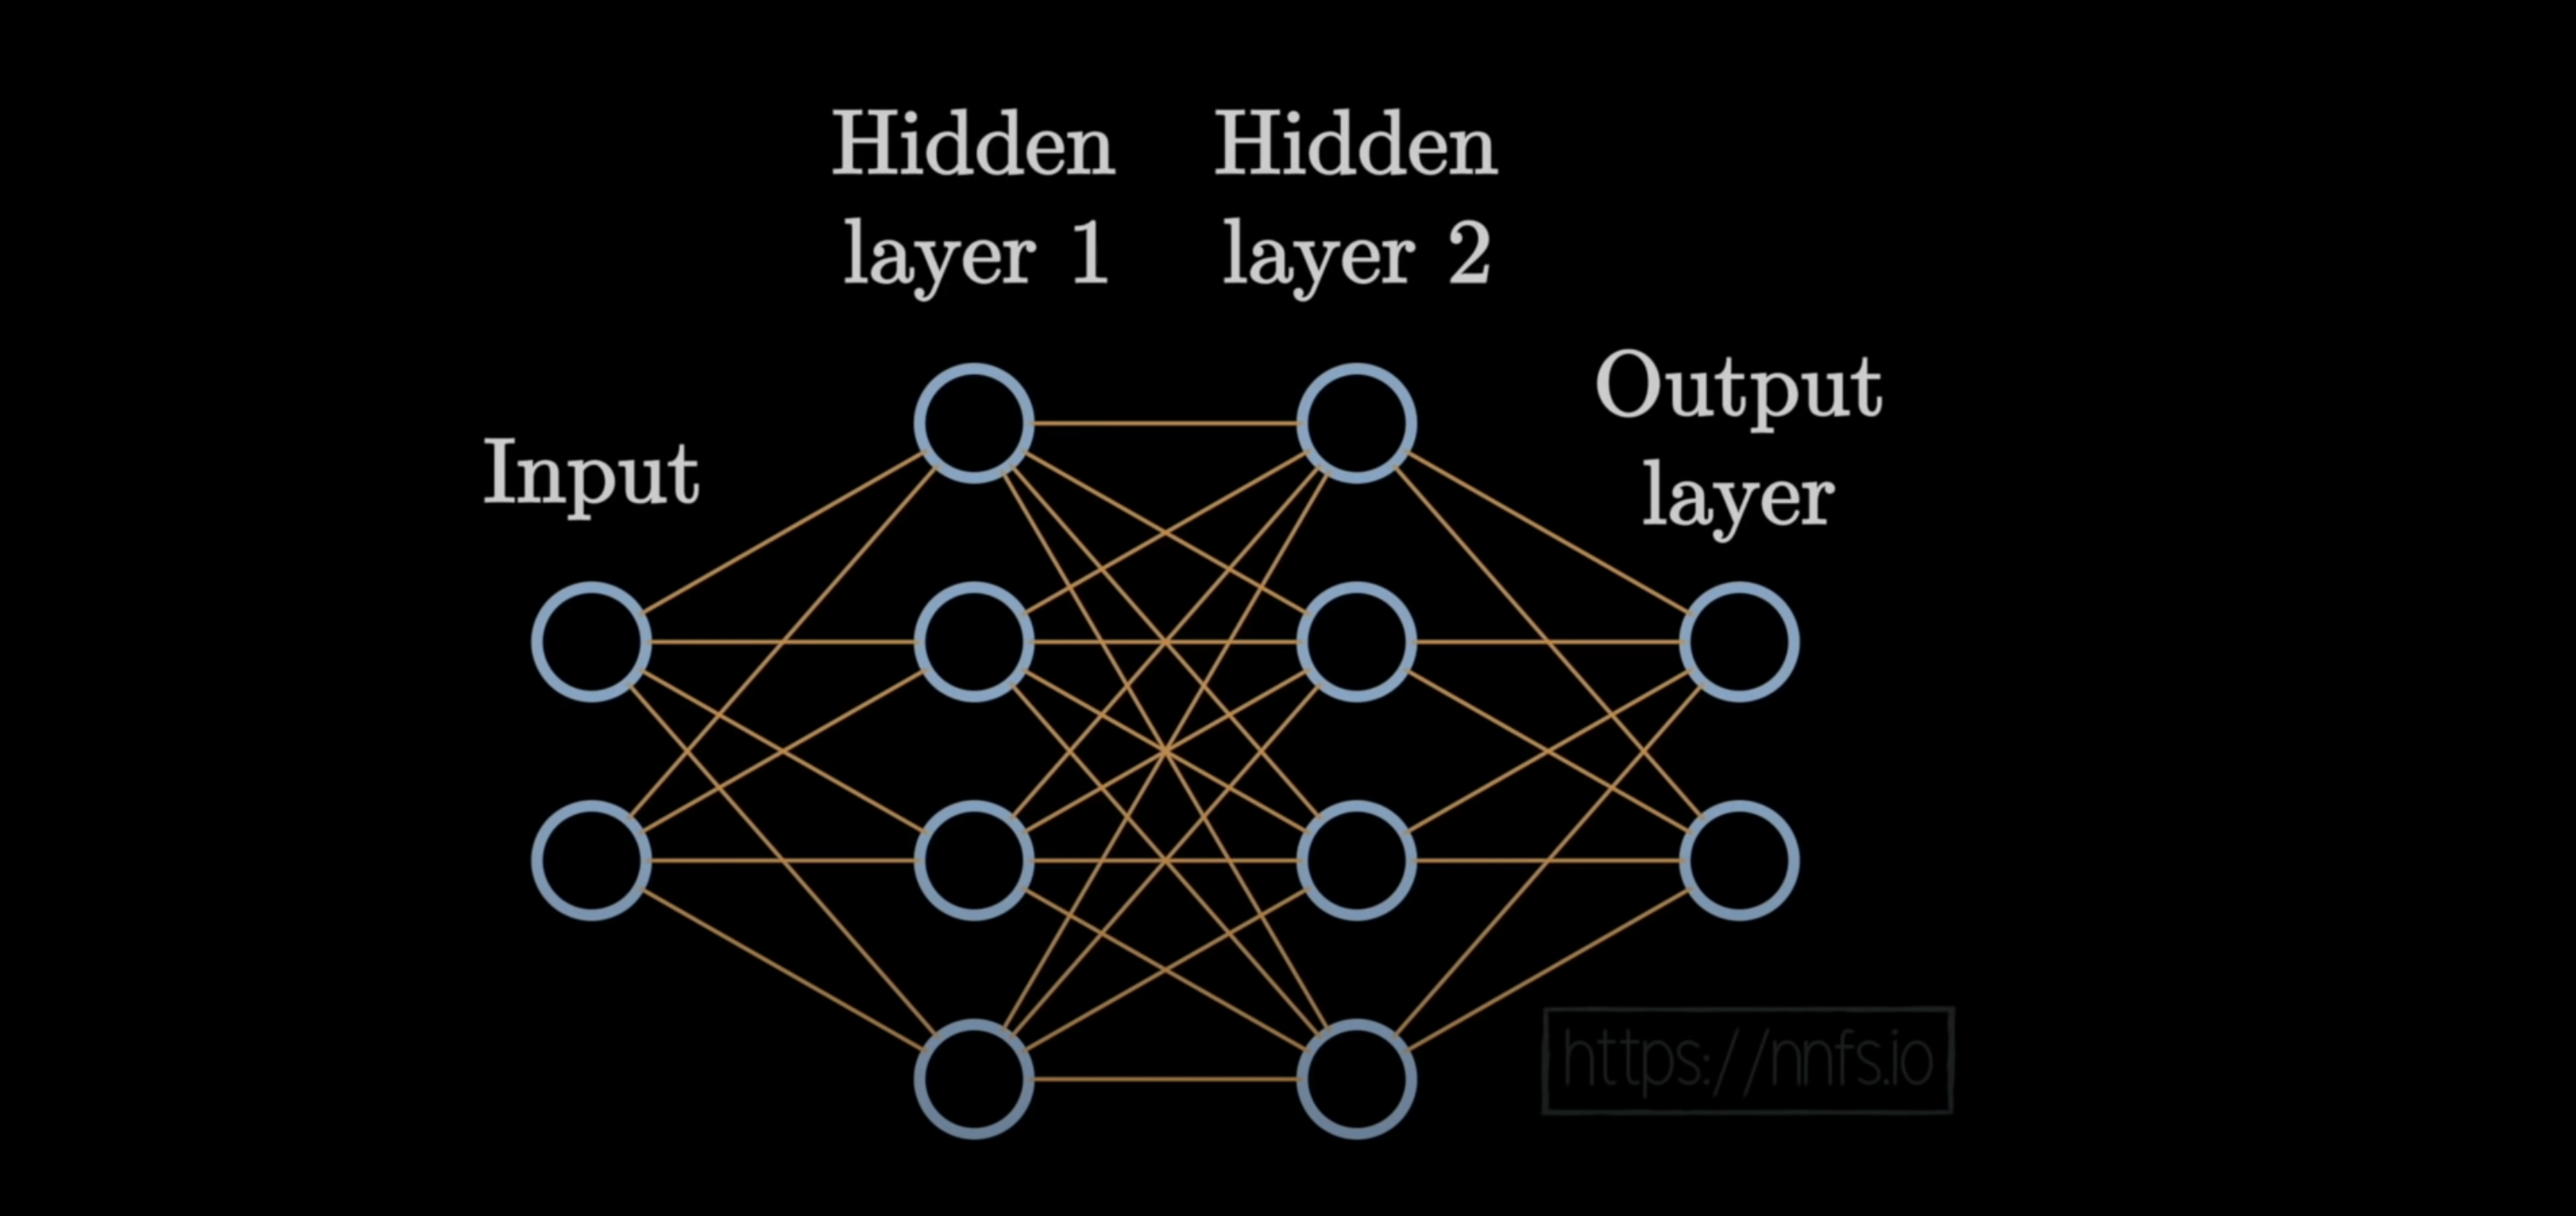

Let's start by coding a neuron from a <font color='#e59454'>*fully connected*</font> neural network like the one above. In a fully conncted neural network, every neuron has a unique connection to every single previous neuron.

Let's say we have 3 neurons from the previous layer feeding into the neuron we are building.

Consider the single neuron below:

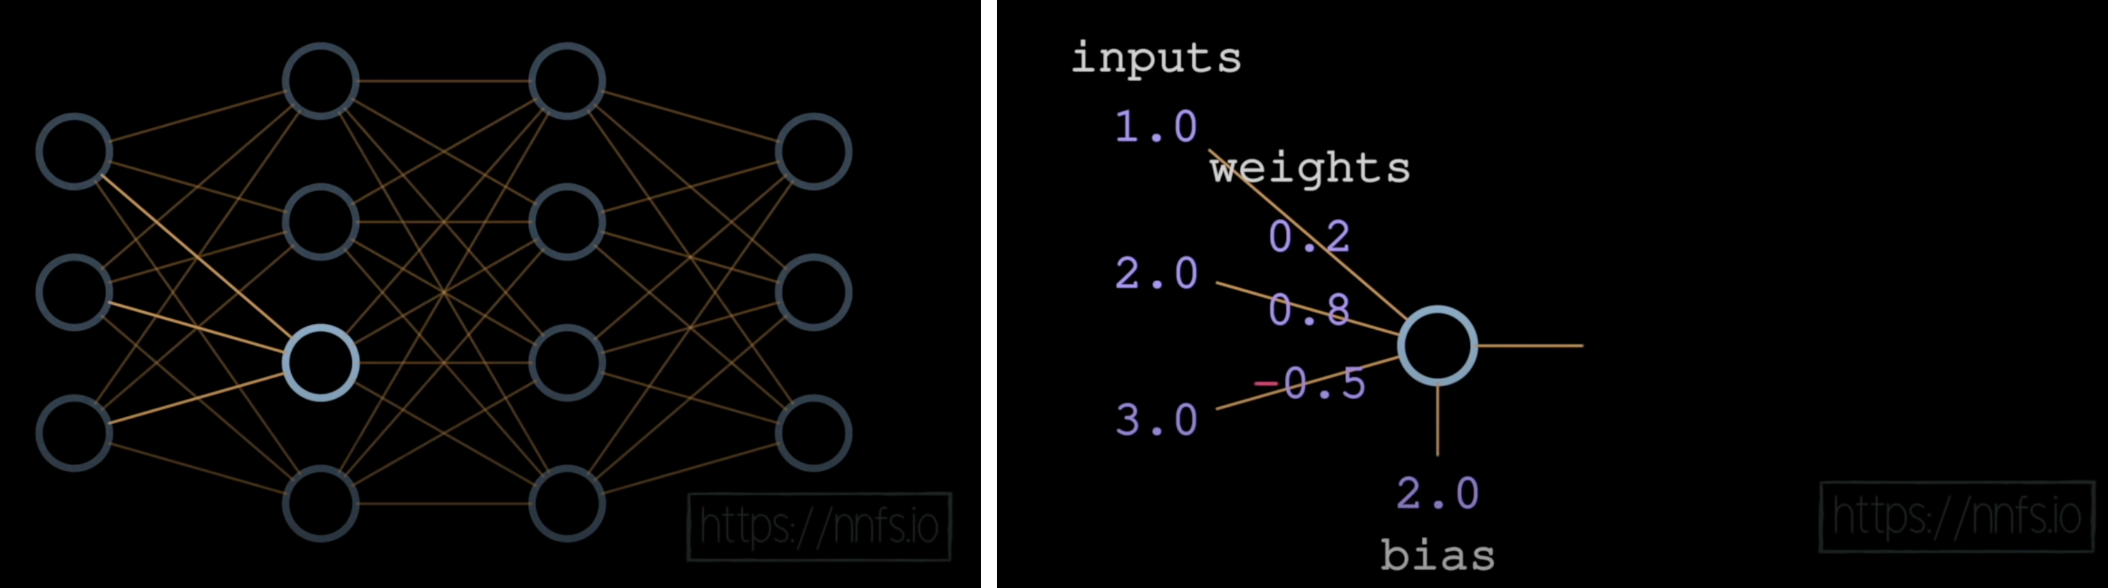

Let's calculate the outputs from the previous layer (which had 3 neurons)

In [3]:

# this will be the input to our current neuron
inputs = np.array([1, 2, 3])

# every unique input will have a unique weight associated with it
# since we have three inputs, we have 3 weights
weights = np.array([0.2, 0.8, -0.5])

# every unique neuron has a unique bias
bias = 2

# output from our neuron is the input*weight + bias
output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
print(output)

2.3


Now let's model one of the output layer neurons (layer 4, top neuron)

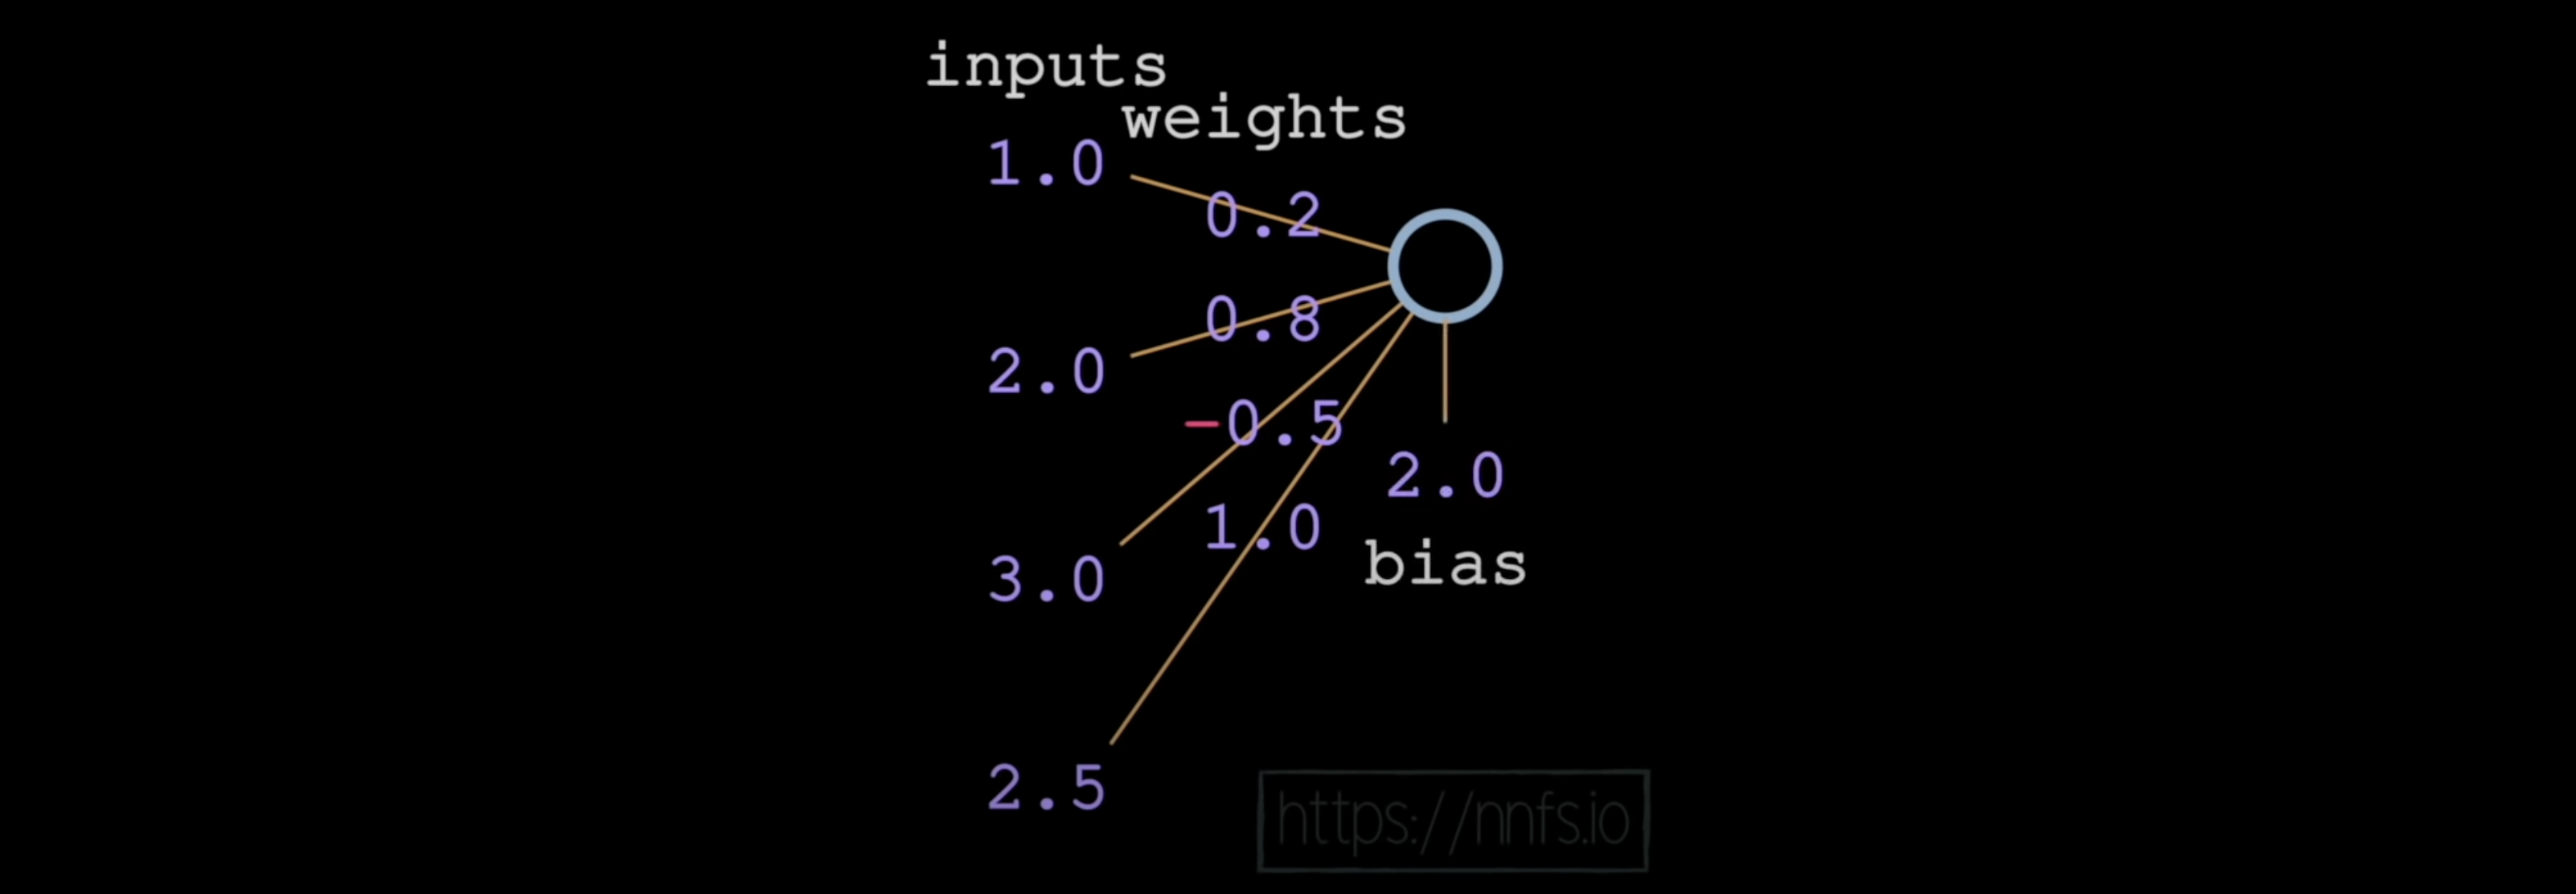

What's going to change? You have one more unique weight, but do you have any other biases? Nope! We are still only modeling a single neuron which has one associated bias.

<font color='#e59454'> <b> Can you calculate the output of the neuron above using the same methodology of the previous cell?

In [5]:
### PSEUDO CODE ###

# define input array variable
input = np.array([1.0, 2.0, 3.0, 2.5])
# define weight array variable
weights = np.array([0.2, 0.8, -0.5, 1.0])
# define bias variable
bias = float(2.0)

# output = input * weight + bias
output_test = (input*weights).sum() + bias
output = (input[0]*weights[0]) + (input[1]*weights[1]) + (input[2]*weights[2]) + (input[3]*weights[3]) + bias
# print(output)
print(output_test) # using numpy to do (input*weights).sum() rather than the more explicit method used for output
print(output)

4.8
4.8


In [ ]:
#@markdown <font color='#e59454'> Use this code if you're stuck

inputs = np.array([1.0,2.0,3.0,2.5])
weights = [0.2, 0.8, -0.5, 1.0]
bias =[2.0]
output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias
print(output)

# <b> <font color='#569098'> Section 2: Coding a layer of neurons

How about modeling 3 neurons, each with 3 inputs?


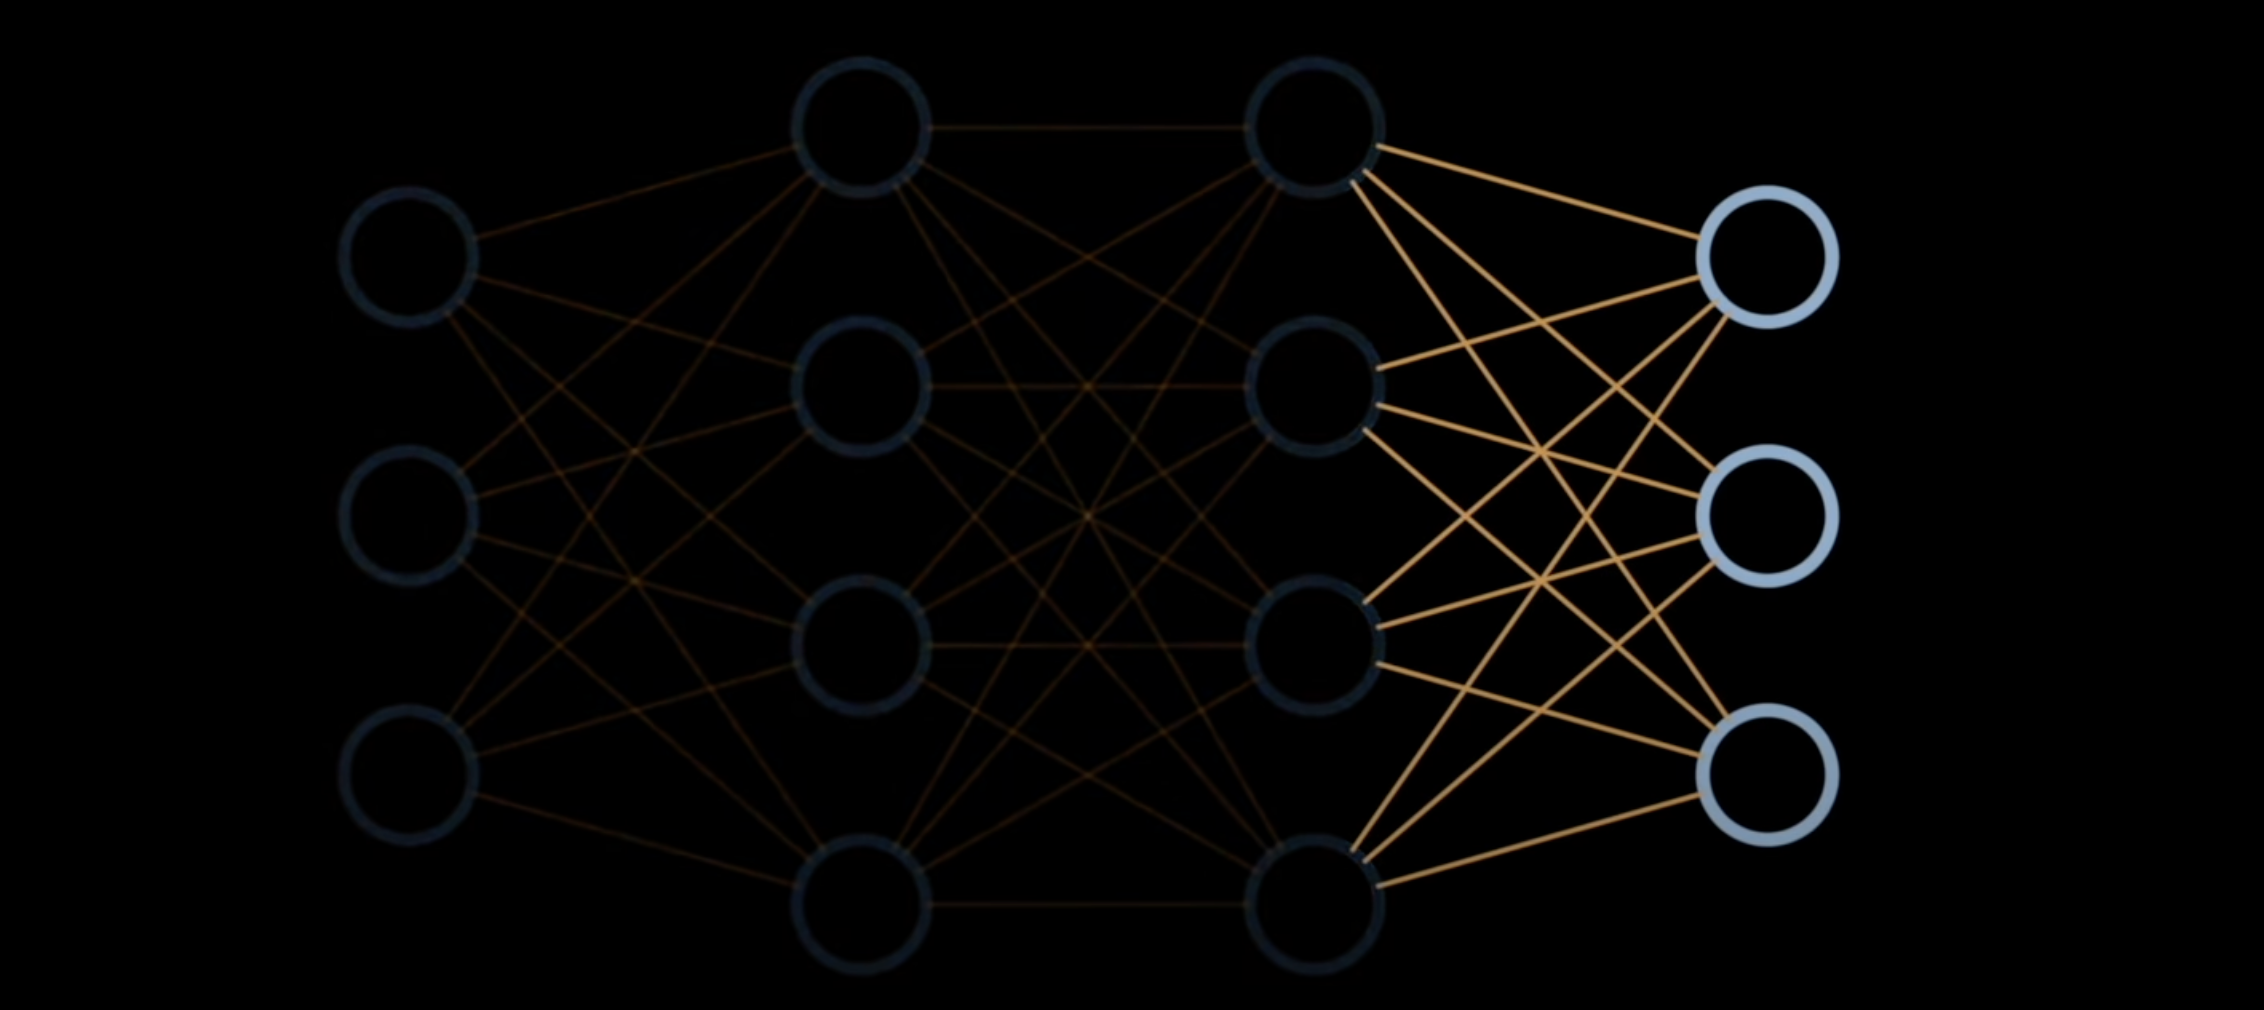

Since there are three neurons, there's going to be 3 unique weight sets. Each weight set is going to have 4 values (because there are 4 inputs). We'll also need 3 unique biases.

In [7]:
# inputs are from hidden layer
inputs = np.array([1, 2, 3, 2.5])

# neuron 1 (top)
weights1 = np.array([0.2, 0.8, -0.5, 1.0])
bias1 = 2

# neuron 2 (middle)
weights2 = np.array([0.5, -0.91, 0.26, -0.5])
bias2 = 3

# neuron 3 (bottom)
weights3 = np.array([-0.26, -0.27, 0.17, 0.87])
bias3 = 0.5

# 3 neurons, with 4 inputs each
# each neuron has unique set of weights and a separate bias
# since our layer has 3 neurons, the layer output should be 3 values (one value for each of the neurons)
output = [inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3]+ bias1,
          inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3]+ bias2,
          inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3]+ bias3]

# In more concise code:
output_test = [
    (inputs*weights1).sum() + bias1,
    (inputs*weights2).sum() + bias2,
    (inputs*weights3).sum() + bias3
]

print(output)
print(output_test)

[np.float64(4.8), np.float64(1.21), np.float64(2.385)]
[np.float64(4.8), np.float64(1.21), np.float64(2.385)]


What if we wanted the `output` to be something different? How would you achieve that? We can't change the `input` of a neuron since that's already provided from the previous layer (or it's from the input layer). What about the `weights` and `bias`? Are they fixed?

It should start to become a little clearer that the `weights` and `biases` are like knobs in an neural network which we can tinker with to change the communication between all the other neurons.

Lets simplify the code above with a `list` of `lists` for weights (still 3 neurons). This is a cleaner way of doing inputs*weights + bias for a layer

In [ ]:
inputs = np.array([1, 2, 3, 2.5])

# lets format the weights as a list of lists
weights = np.array([[0.2, 0.8, -0.5, 1.0],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]])

print("weights = ", weights)

# and a list for the biases
biases = np.array([2,
                   3,
                   0.5])

print("bias =", bias)

# output of current layer
layer_outputs = []

# zip together weights and biases (combines 2 lists into list of lists element-wise)
for neuron_weights, neuron_bias in zip(weights, biases):
  # output of given neuron
  neuron_output = 0

  for n_input, weight in zip(inputs, neuron_weights):
    # sum the inputs * weights
    neuron_output += n_input*weight

  # add the bias term
  neuron_output += neuron_bias
  # output from neurons
  layer_outputs.append(neuron_output)

print("output =", layer_outputs)

[4.8, 1.21, 2.385]


Why do we need both `weights` and `biases` to tune/tweak? Hypothetically you don't need both. But having both help diversify your possible outputs since they both offer different types of modifications. This is exactly like conceptualizing the graph y = mx + b. Changing your slope (weight) affects the steepness of your graph, and changing your b (bias) changes the location of your plot.

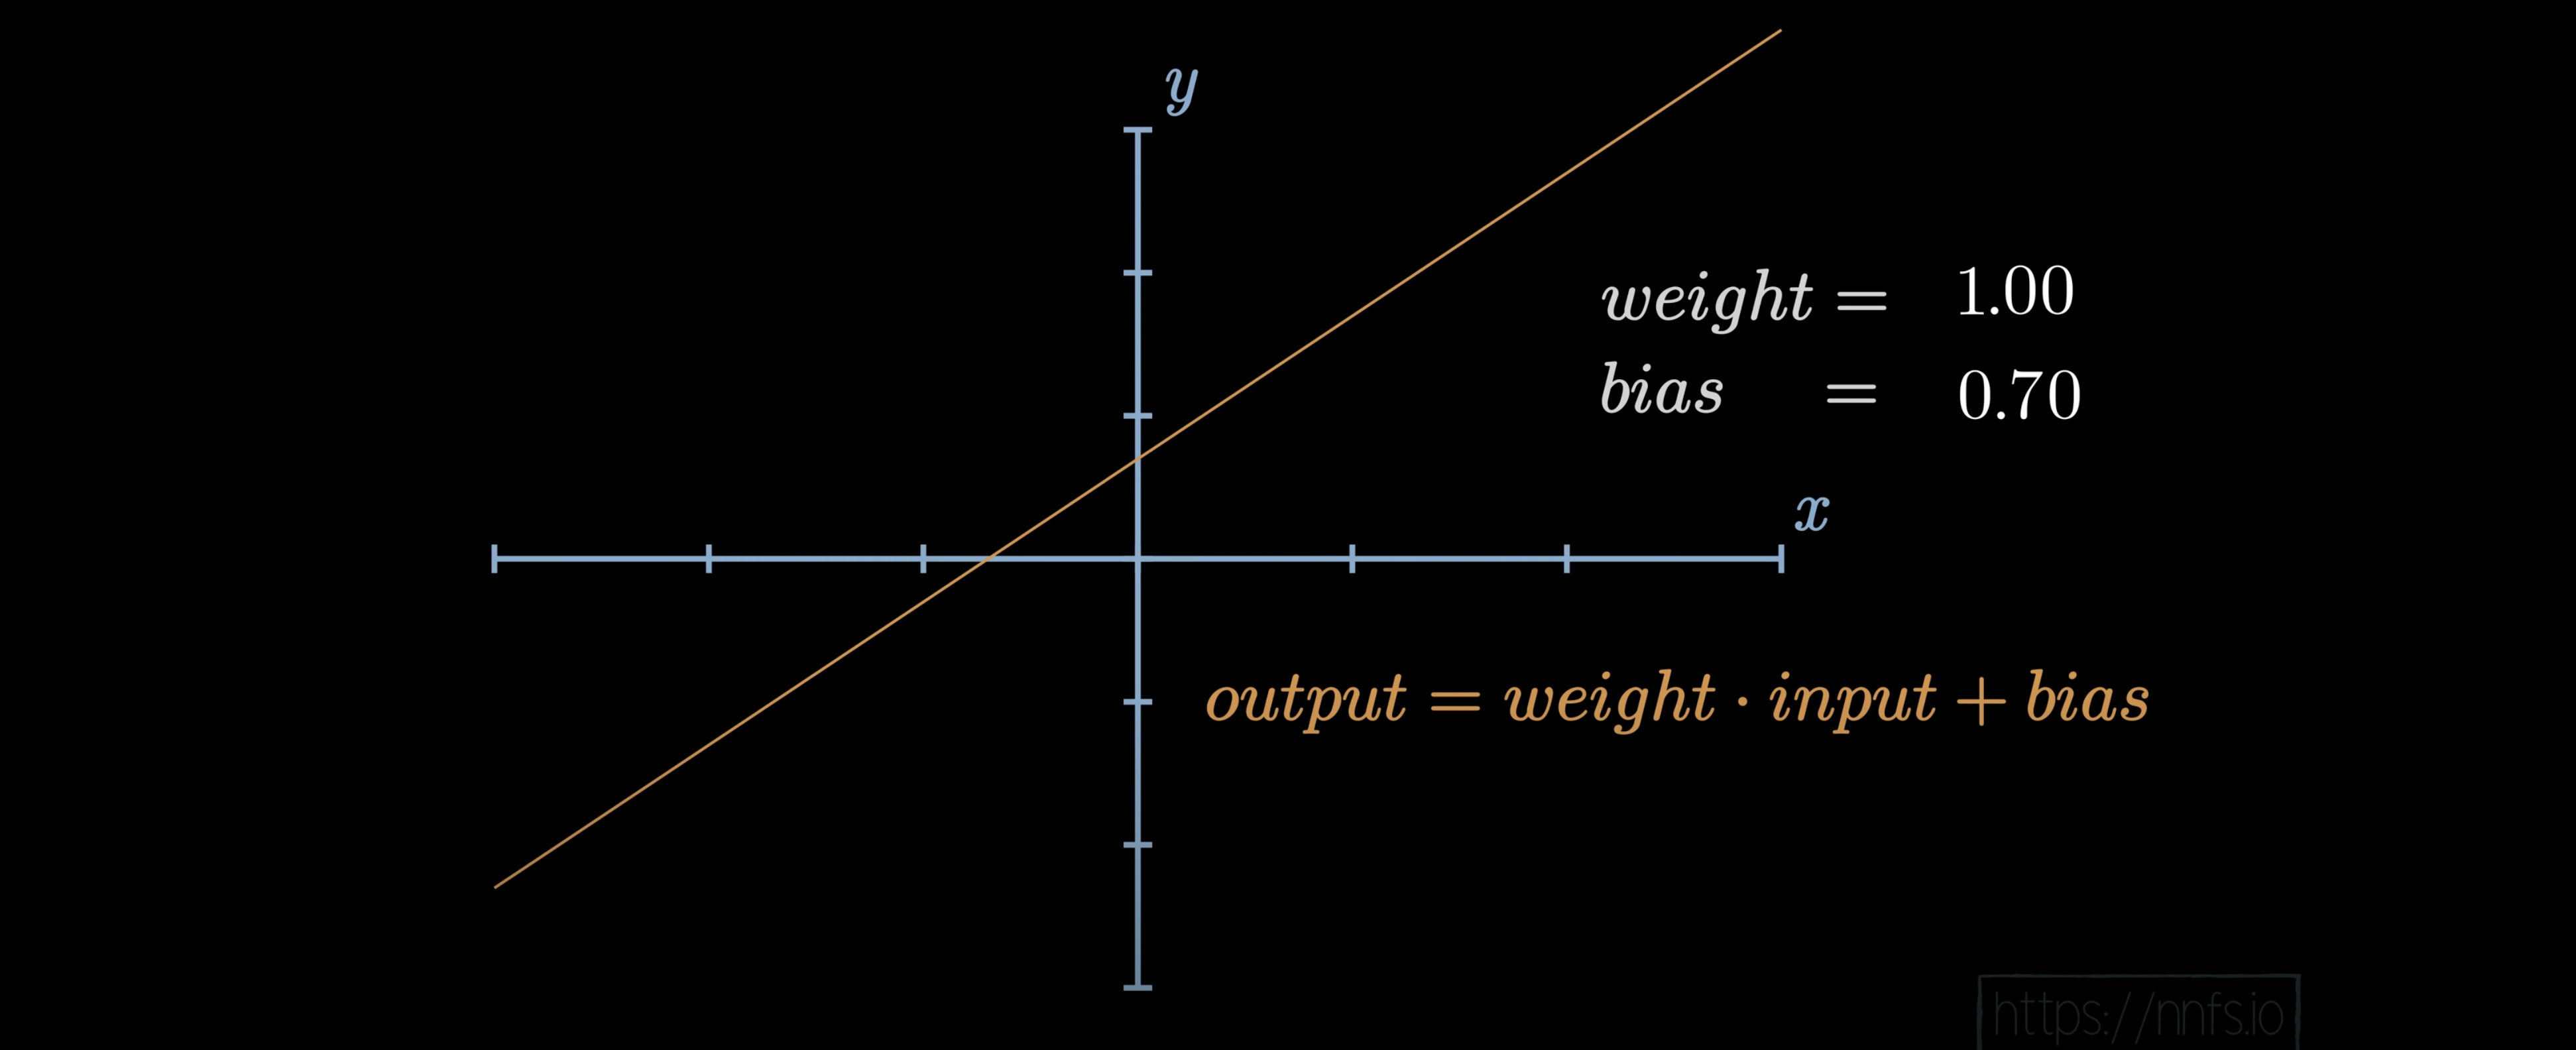

We'll be working with arrays of many shapes and sizes. Consider the three below:

In [ ]:
# type: list, 1D array, vector
l = np.array([1, 5, 6, 2])

# type: list of lists, 2D array, matrix
lol = np.array([[1, 5, 6, 2],
                [3, 2, 1, 3]])

# type: list of list of lists, 3D array
lolol = np.array([[[1, 5, 6, 2],
                   [3, 2, 1, 3]],
                  [[5, 2, 1, 2],
                   [6, 4, 8, 4]],
                  [[2, 8, 5, 3],
                   [1, 1, 9, 4]]])

<b><font color='#e59454'> Print the shape of each below using the `.shape` numpy method</font></b>

In [ ]:
### PSEUDOCODE ###
# print( shape of l, lol, and lolol )

In [ ]:
#@markdown <font color='#e59454'>Double Click to See Answer!</font>
print(l.shape, lol.shape, lolol.shape)

<font color='#e59454'> **Note that arrays have to be homologous:**</font>
 At each dimension, they need to have the same size

##**<font color='#569098'> Introduction to dot product</font>**

(feel free to skip if you already have a firm grasp)

How do we multiply `inputs` (vector) by `weights` (matrix of vectors)? Dot product! Can you perform the dot product between a and b?

Recall:

$a \cdot b= \sum \limits_ {i=1}^n a_i b_i$

<font color='#e59454'> <b> Write the code for a dot product in the code box below </b>


In [ ]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])

### PSUEDO CODE ###
# dot product is multiplying element-wise the values of the vectors and adding them together
# dot_product = ?

# results in single, scalar value
# print dot_product

<font color='#e59454'> <b> Write the code to calculate the `output` for a single neuron connected to 3 neurons in the previous layer </b>


In [ ]:
# We can write this more succinctly with numpy
inputs = np.array([1, 2, 3, 2.5])
weights = np.array([0.2, 0.8, -0.5, 1.0])

bias = 2

# here order doesnt matter, but why does weight normally come first?
output = np.dot(weights, inputs) + bias
print(output)

4.8


<font color='#e59454'> <b> Write the code to calculate the output for a dotlayer of neurons in the code box below </b>


In [ ]:
# dot product in numpy for a layer of neurons
inputs = np.array([1, 2, 3, 2.5])

weights = np.array([[0.2, 0.8, -0.5, 1.0],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]])

biases = np.array([2, 3, 0.5])

output = np.dot(weights, inputs) + biases # now order DOES matter

# here we perform the dot product 3 times:
# [np.dot(weights[0], inputs),
#  np.dot(weights[1], inputs),
#  np.dot(weights[2], inputs)] = [2.8, -1.79, 1.885]

# then add biases:
# np.dot(weights, inputs) + biases = [2.8, -1.79, 1.885] + [2.0, 3.0, 0.5] = [4.8, 1.21, 2.385]

print(output)

[4.79999995 1.21000004 2.38499999]


## **<font color='#569098'> A comment on batches</font>**

Batches allow calculating things in parallel. The bigger the batch, the more parallel operations we can run. This is also why we tend to do neural network training on GPUs which have 100s-1000s of cores that we can run calculations on (rather than 4-8 cores on CPUs). Batches also help with *generalization*. Exposing our network with multiple datapoints at a time, rather than one at a time or all points at once, is widely understood to help a neural network to generalize. Generally we will work with batch sizes of 32, 64, maybe 128

# <b> <font color='#569098'> Section 3: Hidden layer activation functions

Activation functions are used for a multitude of reasons in the `hidden layers` (layers other than the input or output layer). They help normalize the output of each neuron which prevents values from growing too large or too small as they pass through the network.

Each neuron will have an activation function, which comes into play after calculating the `inputs * weights + bias`.

Thus the `output` = Activation Function (`inputs * weights + bias`)

Here we will talk about 3 activations functions
1. Step function
2. Sigmoid function
3. Rectified linear (ReLU) function.

In the <b> <font color='#e59454'> step function </b></font> if the input is greater than 0 the output is 1, otherwise the output is a 0.

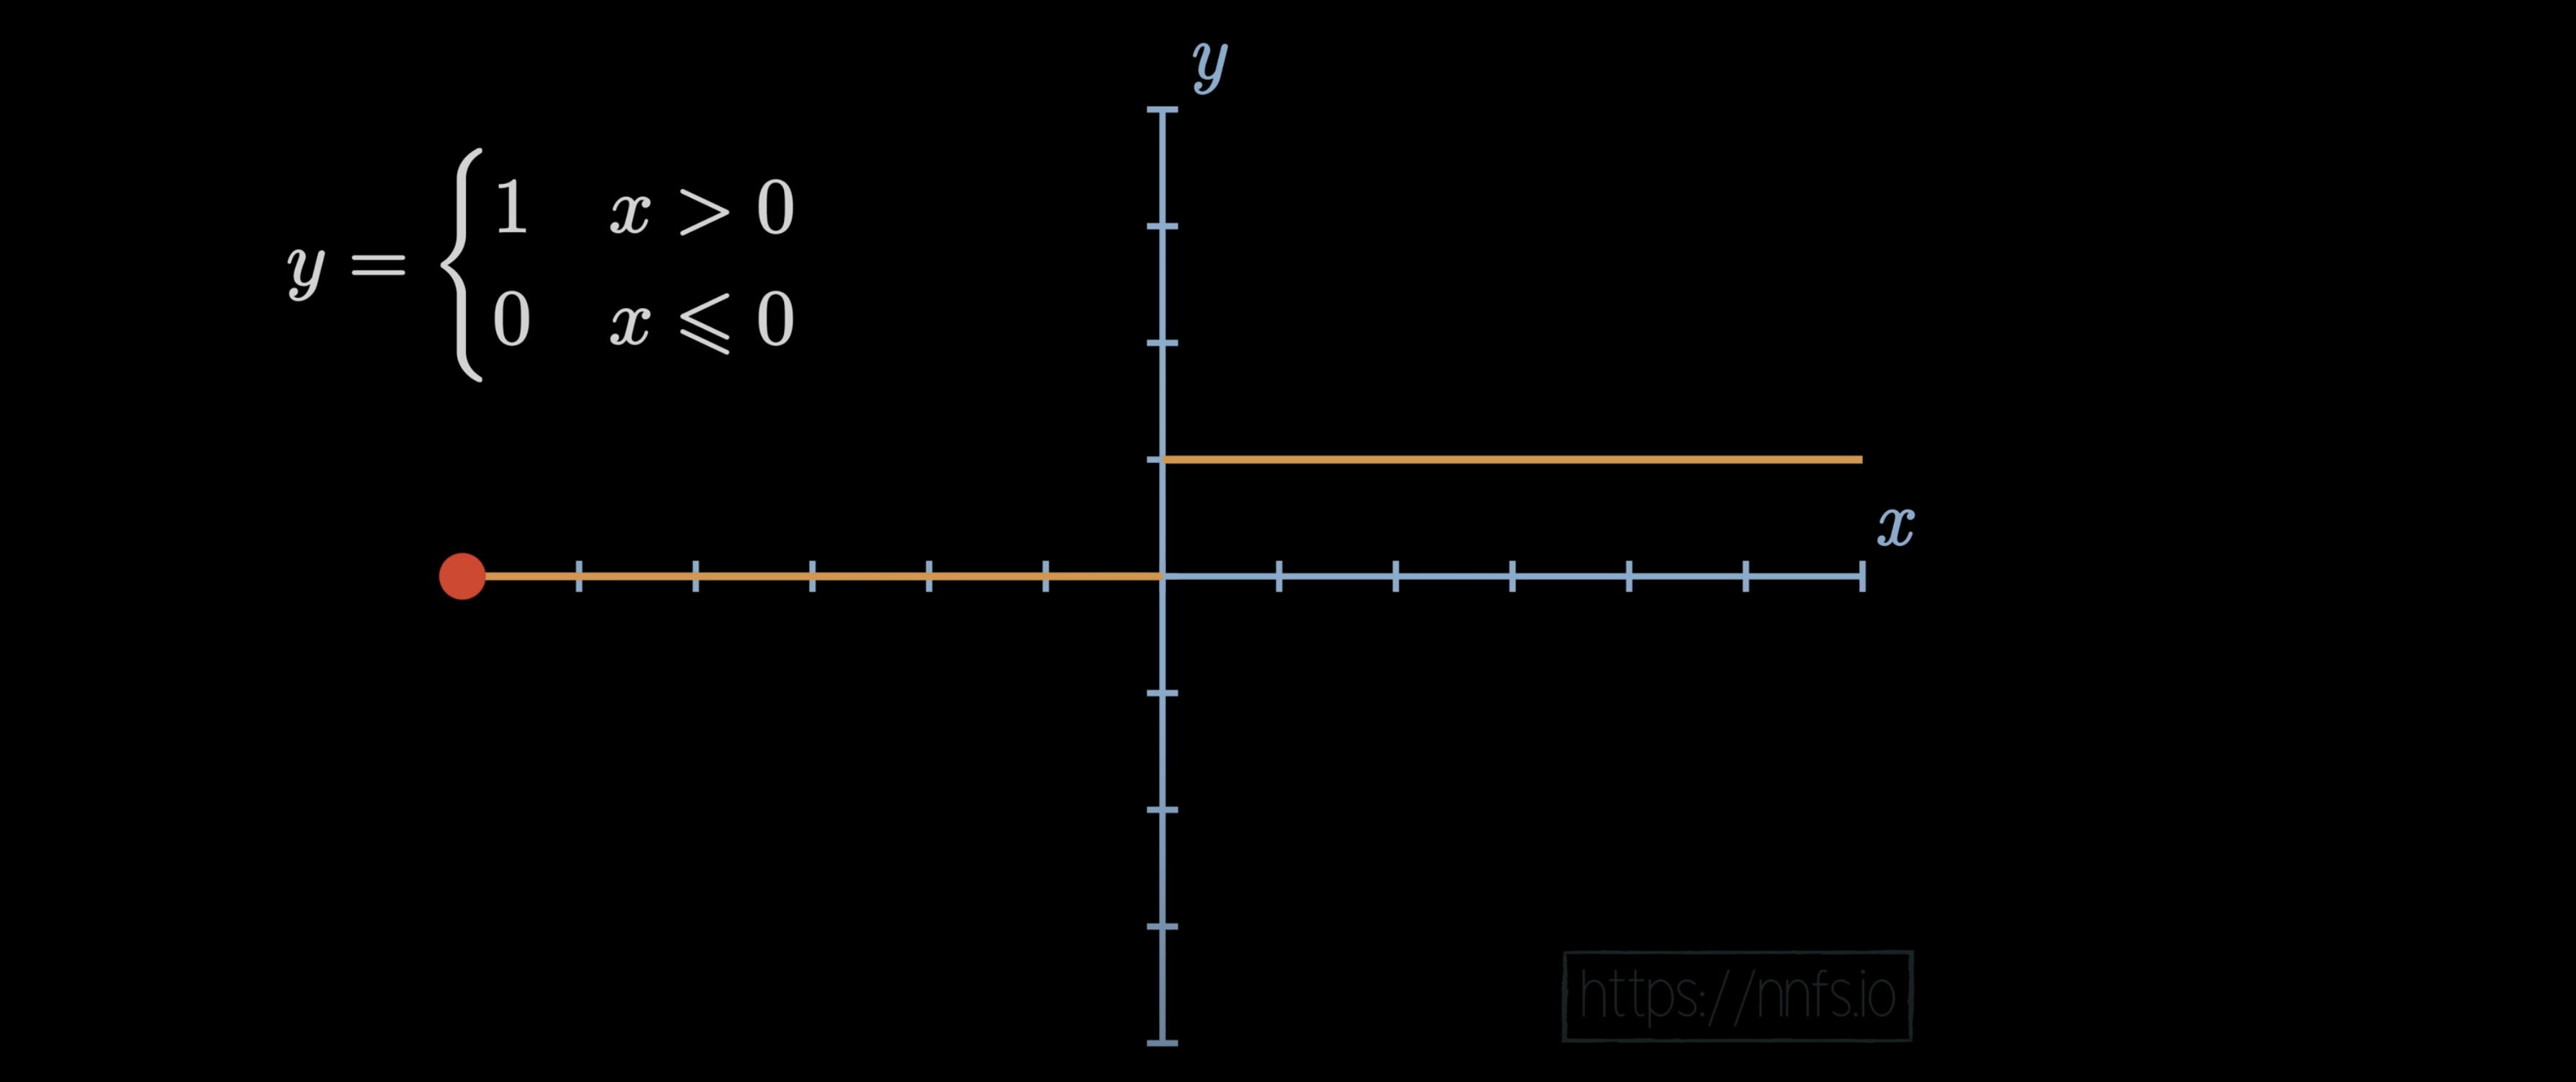

 Therefore in the case of the step function, the output of your neuron is literally a 0 or a 1.

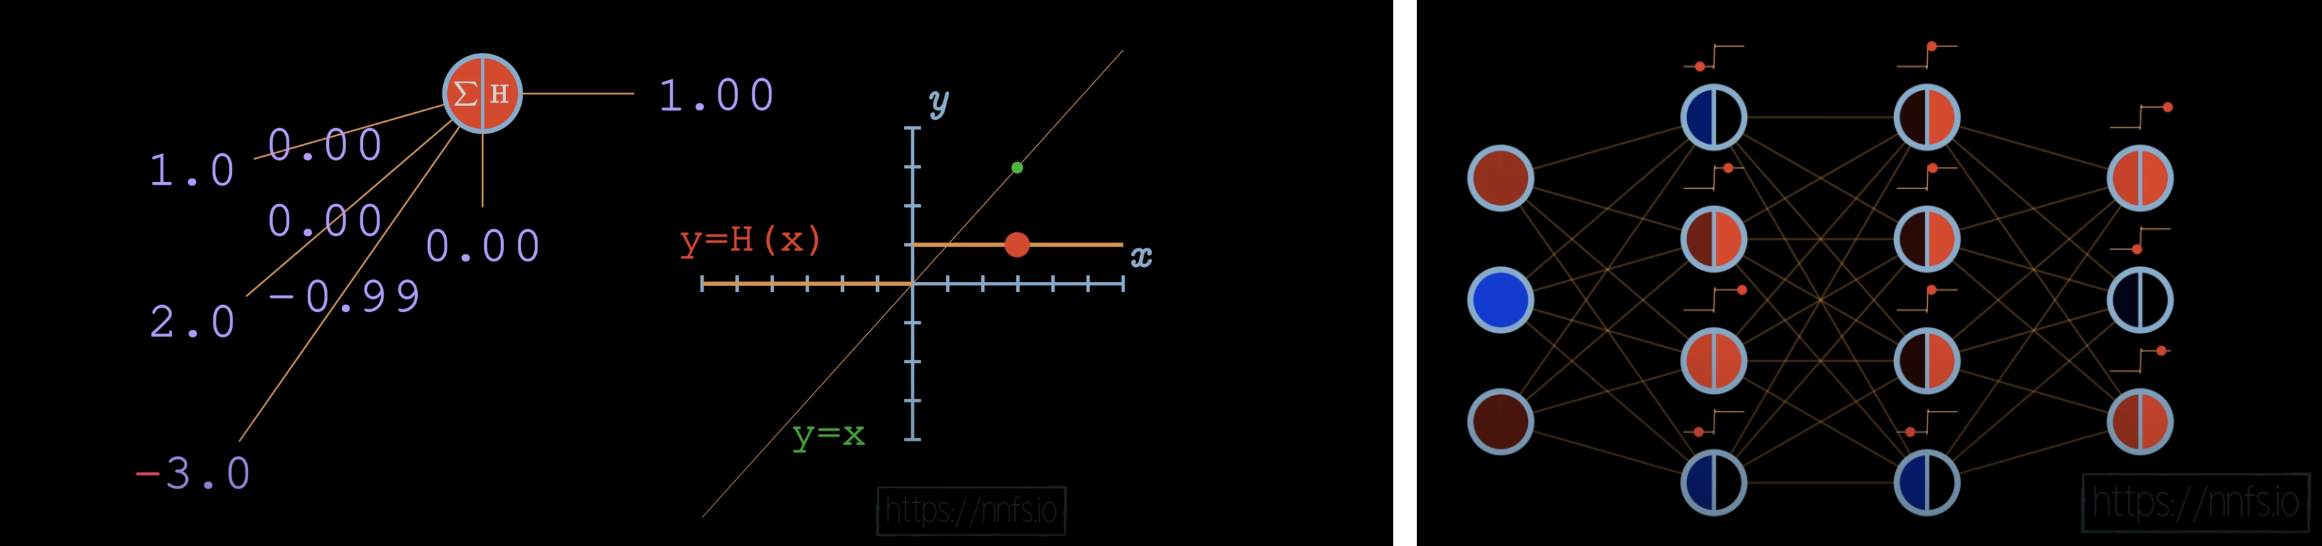

Whie this is theoretically okay, it quickly becomes obvious that using something with more granularity would lead to better training for a neural network. For example in the step function, if the output is 0, how do we know how close input value was from reaching an output of 1? Knowing this will help the model to correct itself better and comes into play when computing *`loss`* and *`optimizing`* our weights and biases.

One such function would be the <b><font color='#e59454'>sigmoid function</font></b>. We can readily see how close (or far away) the output is to 0 (or 1). However, even the sigmoid functions are not perfect but their drawback of *vanishing gradients* won't make too much sense until we get to gradients.

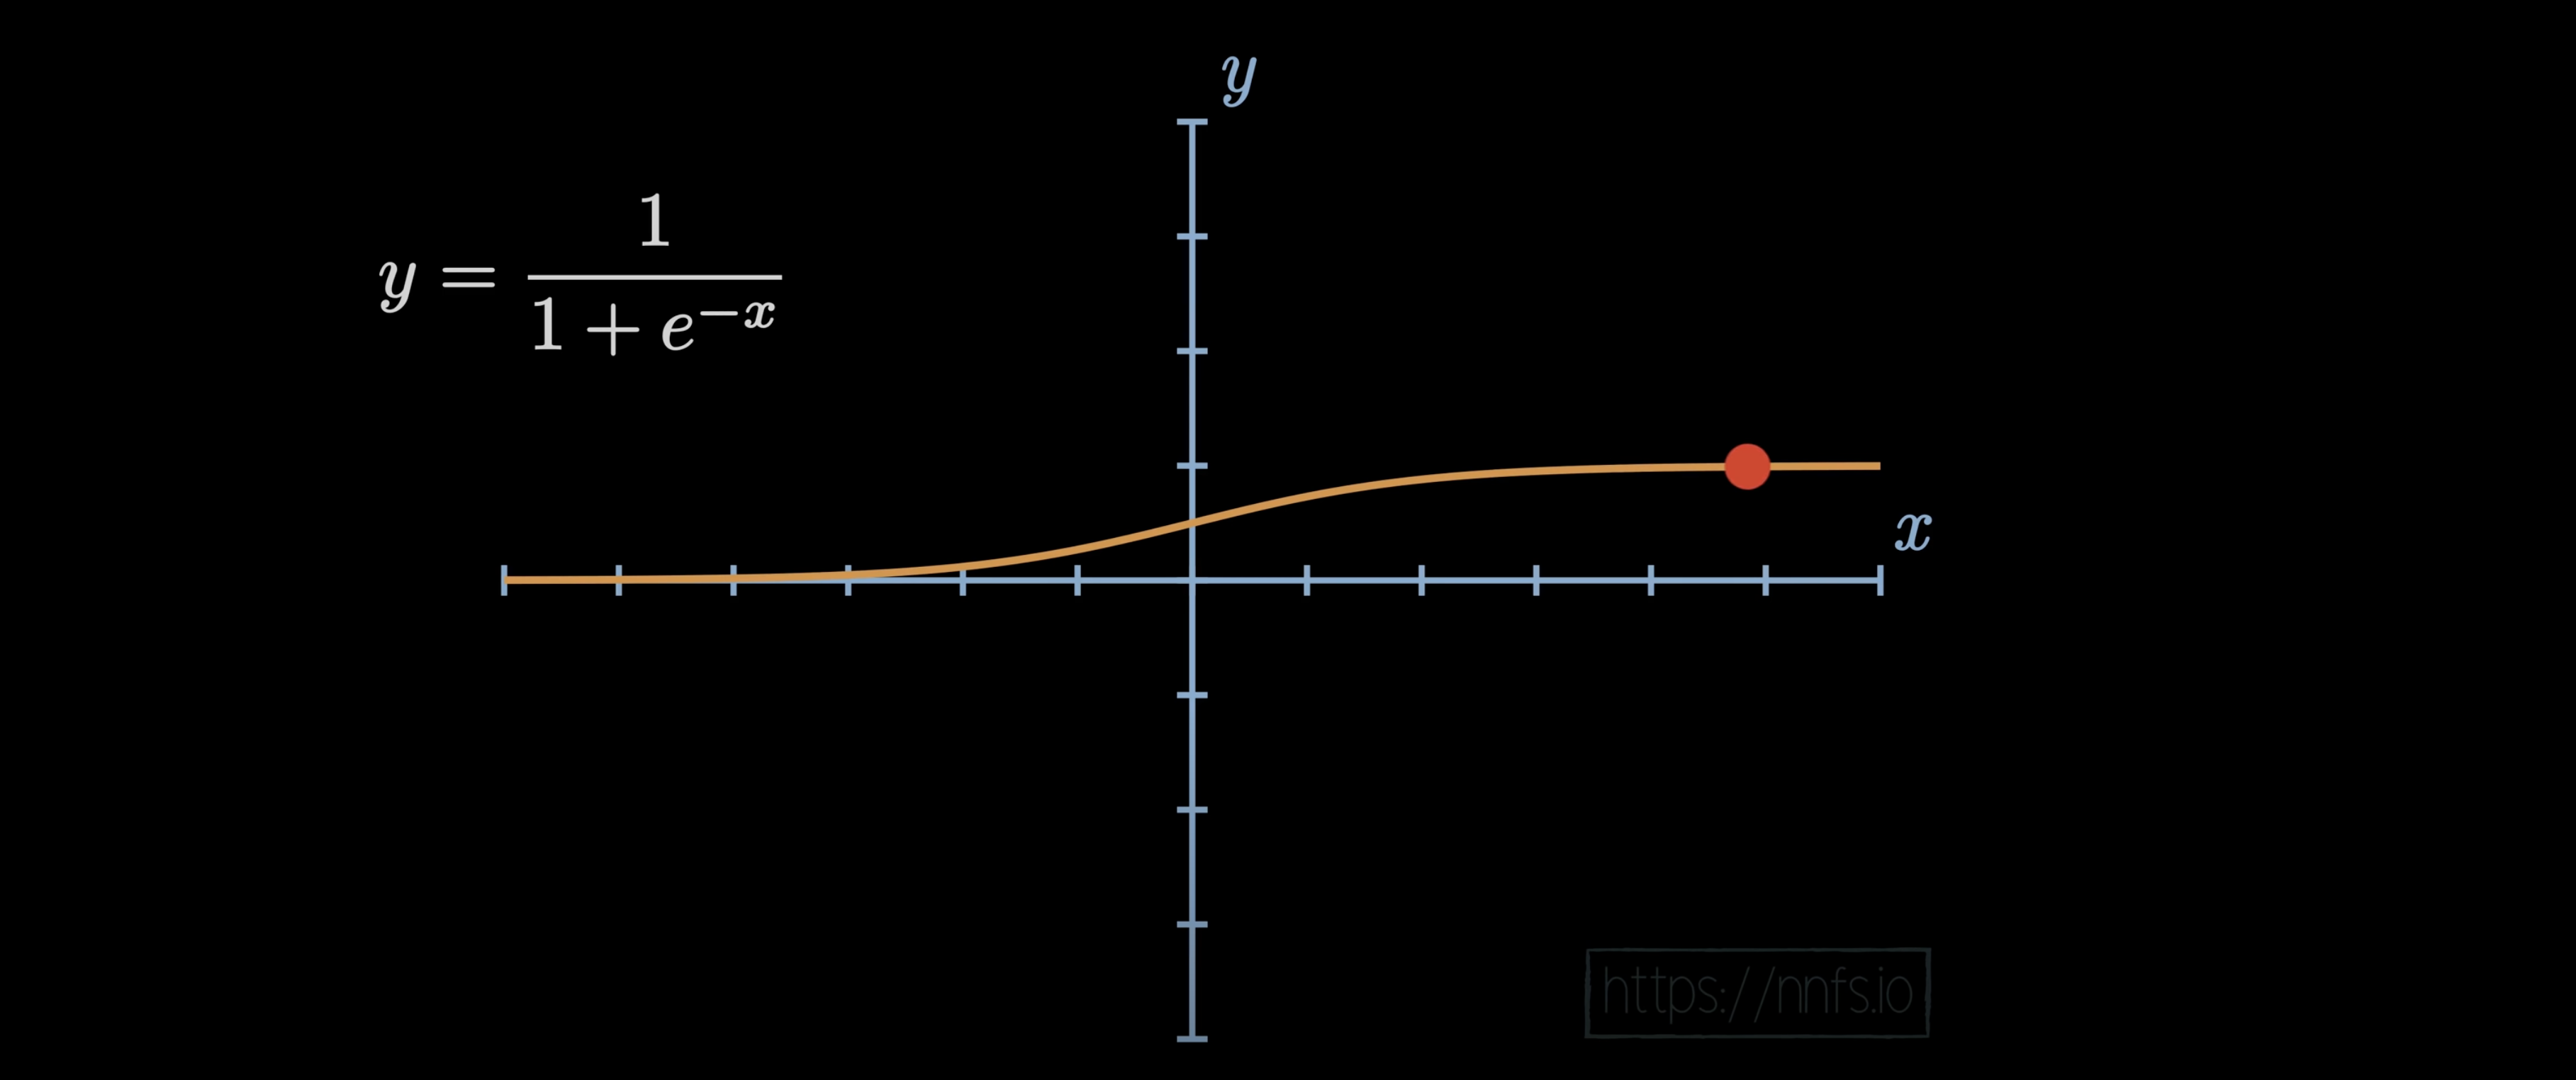

This brings us to the <b><font color='#e59454'>rectified linear unit (ReLU) activation function</font></b>.

If x is greater than 0, the output is whatever x is, and otherwise the output is 0. One of the main reasons we use the ReLU is that it's fast: If x less than 0 output 0, if x is greater than 0 output x.

You may question why we don't use a linear activation function (like y=x), but modeling non-linear data with a linear function is just not possible :(
So we do need non-linear activation functions

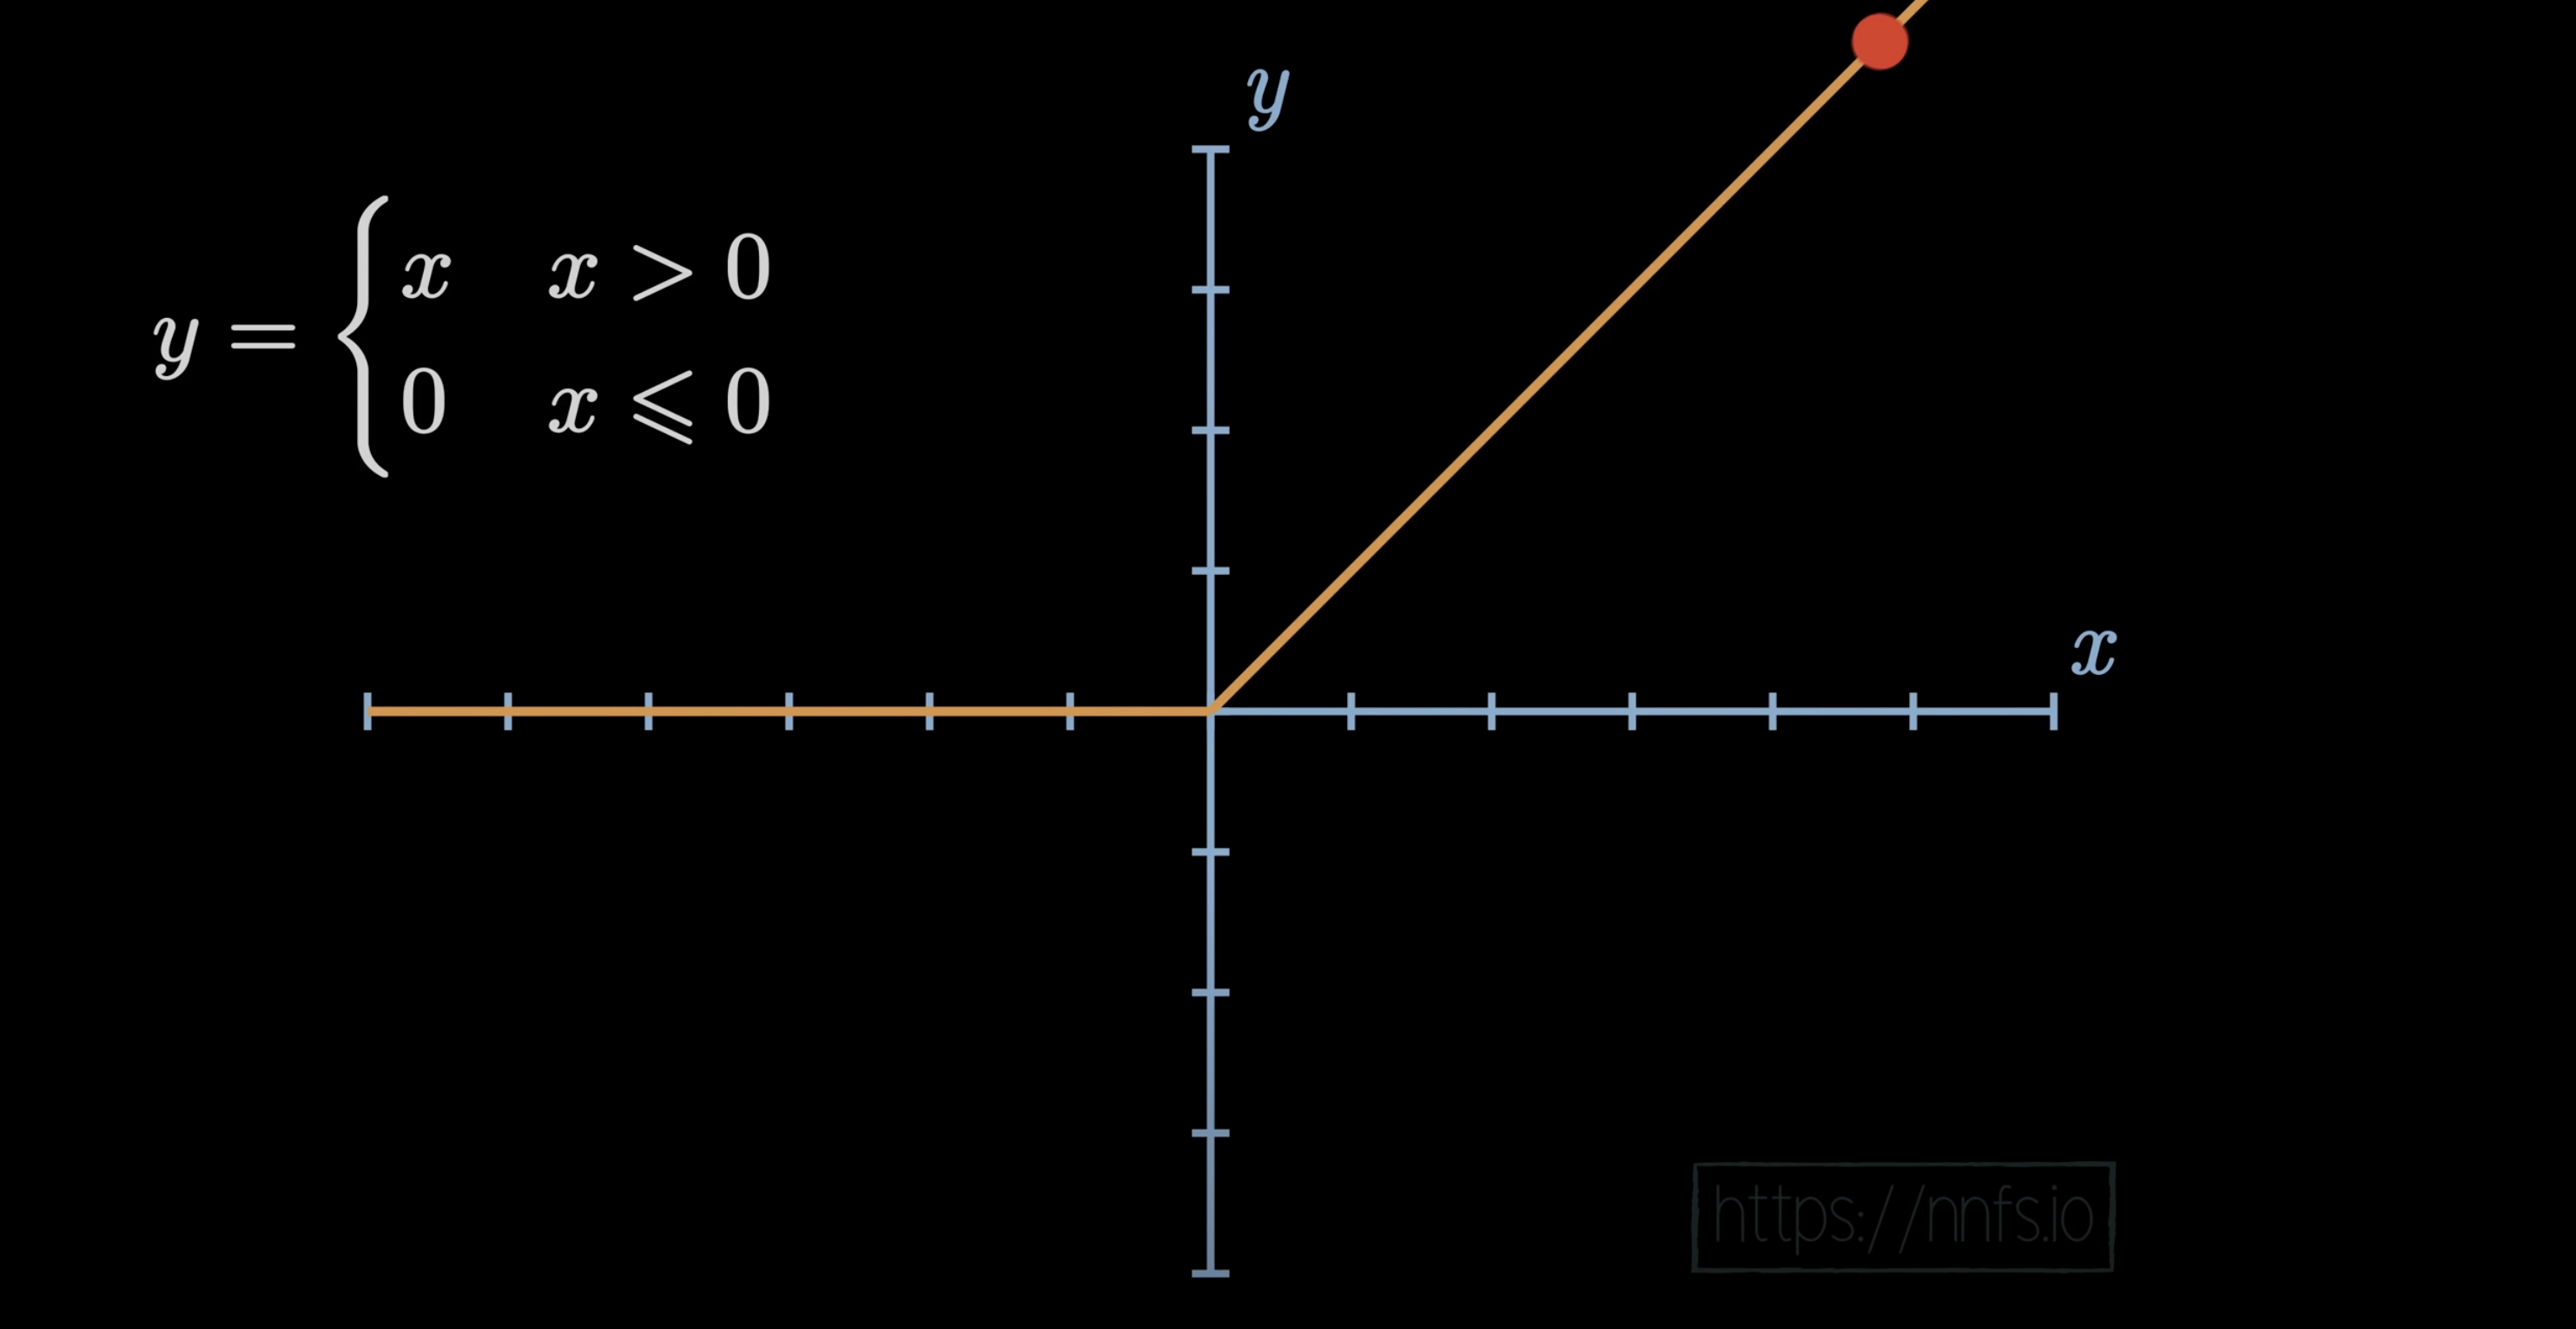

Let's recall the different parameters for tweaking the output of a neural network we have learnt so far..

Revisiting how tweaking the weights and biases will affect the output of our neuron... changing the weights will change the strength (slope) of the activation, and we can offset the activation point with the bias. You could also negate the weight to instead see what value of x is needed to *deactivate* your neuron

In [ ]:
#@markdown <font color='#e59454'> <b> Food For Thought! Run to Show Question </b>

from IPython.display import HTML, display
def match_the_following(questions, answers):
    print("Match the following:")

    for q in questions:
        print(q)
    for a in answers:
        print(a)

    # Get user inputs
    response = {
        "1": input("Match for 1 (enter A, B, or C): ").upper(),
        "2": input("Match for 2 (enter A, B, or C): ").upper(),
        "3": input("Match for 3 (enter A, B, or C): ").upper(),
    }

    # Define correct answers
    correct_answers = {"1": "B", "2": "A", "3": "C"}

    # Check and provide feedback
    for key, value in correct_answers.items():
        if response[key] == value:
            print(f"Correct match for {questions[int(key)-1]}")
        else:
            print(f"Incorrect match for {questions[int(key)-1]}. The correct answer is {value}.")

# Call the function
questions = ["1. What controls the offset of the output", "2. What controls the strength/slope of the output?", "3. What do we use to normalize the output?"]
answers = ["A. Weights", "B. Bias", "C. Activation Function"]

match_the_following(questions, answers)



Match the following:
1. What controls the offset of the output
2. What controls the strength/slope of the output?
3. What do we use to normalize the output?
A. Weights
B. Bias
C. Activation Function
Match for 1 (enter A, B, or C): B
Match for 2 (enter A, B, or C): A
Match for 3 (enter A, B, or C): C
Correct match for 1. What controls the offset of the output
Correct match for 2. What controls the strength/slope of the output?
Correct match for 3. What do we use to normalize the output?


<font color='#e59454'> <b> Write an algorithm in the coding cell below that accepts each value from the `inputs` array and computes the `output` of the `ReLU function` for each value

In [ ]:
inputs = np.array([0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100])
output = []

### PSEUDO CODE ###
# for i in inputs:
#   if i is greater than 0, ReLU(i) = i
#   if i is less than or equal to 0, ReLU(i) = 0

# print output

In [ ]:
#@markdown <font color='#e59454'>Double Click to See Answer!</font>

inputs = np.array([0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100])
output = []
for i in inputs:
  if i > 0:
    output.append(i)
  else:
    output.append(0)
print(output)


# <b> <font color='#569098'> Section 4: Output layer activation function

Why another activation function? We want a function to help quantify relative "correct-ness". In the two output layers below, which is relatively more correct? Assuming the first node in the array is the correct prediction, the `layer_outputs1` is probably more correct since it is relatively larger than the other array values.

In [ ]:
layer_outputs1 = np.array([4.8, 1.21, 2.385])
layer_outputs2 = np.array([4.8, 4.79, 4.25])

The softmax function is commonly used in machine learning for multiclass classification tasks. It takes a vector of arbitrary real-valued scores (often called logits) as input and normalizes them into a probability distribution over multiple classes.

The softmax function for a vector $z$ with $K$ elements is defined as:

$$ \text{softmax}(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} $$

where:
- $ \text{softmax}(z)_i $ is the $i$-th element of the resulting probability distribution.
- $e$ is the base of the natural logarithm (Euler's number).
- $z_i$ is the $i$-th element of the input vector $z$.
- The denominator is the sum of exponentiated scores over all classes.

The softmax function ensures that the output probabilities sum to 1, making it suitable for classification tasks where the model needs to output class probabilities. Can you calculate the softmax of `layer_outputs1` and `layer_outputs2`? After computing the softmax of each layer, also print the sum of the softmax'ed array to confirm they sum to 1


In [ ]:
## PSEUDO CODE ##

# layer outputs 1
# softmax(layer_outputs1) = e^(layer_outputs1) / sum( e^(layer_outputs1) )

# layer outputs 2
# softmax(layer_outputs2) = e^(layer_outputs2) / sum( e^(layer_outputs2) )

# print sum( softmax1 ), sum( softmax2)

In [ ]:
#@markdown <font color='#e59454'> Double click if you're stuck </font>

#since we want to calculate the softmax for 2 outputs, instead of writing the code twice we can write a function instead
def calculate_softmax(layer_output):
  softmax = np.exp(layer_output)/ np.sum(np.exp(layer_output))
  return softmax

s1 = calculate_softmax(layer_outputs1)
sum1 = np.sum(s1)
s2 = calculate_softmax(layer_outputs2)
sum2 = np.sum(s2)
print(s1, sum1, s2, sum2)


Lets move from a single vector of a layer's outputs, in reality we'll have a batch of outputs

In [ ]:
# batch of 3 outputs
layer_outputs = np.array([[4.8, 1.21, 2.385], # output 1
                          [8.9, -1.81, 0.2], # output 2
                          [1.41, 1.051, 0.026]]) # output 3
#overflow prevention
layer_outputs = layer_outputs - layer_outputs.max()
exp_values = np.exp(layer_outputs)

# now, how do we do a sum? we use axis
# axis=1 is sum of rows, which is what we want
norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)

print(norm_values)

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


<b><font color='#e59454'>What's overflow prevention?</font></b>

When working with exponentials it is easy to reach really large values that the processor cannot calculate and becomes a roadblock.

In [ ]:
# an example overflow which will become a roadblock in NN calculations
np.exp(10000)

<ipython-input-47-d1c9892547ca>:2: RuntimeWarning: overflow encountered in exp
  np.exp(10000)


inf

We can prevent this in our neural network by taking all of our outputs, and subtracting the largest value in the layer from all values in the layer. Now the largest value is 0 and everything else is less than 0.

# <b> <font color='#569098'> Section 5: Calculating and implementing loss

How can we optimize our model? Should we optimize for accuracy of the predicted label vs true label?
This is a good strategy, but you will be throwing away a lot of useful information since your output is a probability distribution not a single number.

<font color='#e59454'><b>Categorical cross-entropy</b></font> is a commonly used loss function in neural network classification models, especially for multiclass classification tasks. It measures the dissimilarity between the true probability distribution of the labels and the predicted probability distribution outputted by the model. This loss penalizes large errors between the true and predicted probabilities, encouraging the model to output higher probabilities for the correct class labels.


$$ L(y, \hat{y}) = - \frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \log(\hat{y}_{ij}) $$

where:
- $ L(y, \hat{y}) $ is the categorical cross-entropy loss.
- $ N $ is the number of samples in the dataset.
- $ K $ is the number of classes.
- $ y $ is the true one-hot encoded label matrix of shape $ (N, K) $.
- $ \hat{y} $ is the predicted probability distribution matrix outputted by the model of shape $ (N, K) $.
- $ y_{ij} $ is the true probability that sample $i$ belongs to class $ j $.
- $\hat{y}_{ij}$ is the predicted probability that sample $i$ belongs to class $j$.





In [ ]:
softmax_output = np.array([0.7, 0.1, 0.2])
target_output = np.array([1, 0, 0]) # means target class is 1

target_class = 0

# cce = - Σ y_true * log( y_pred)
loss = -(math.log(softmax_output[0])*target_output[0] +
         math.log(softmax_output[1])*target_output[1] +
         math.log(softmax_output[2])*target_output[2])

print(loss)

0.35667494393873245


In [ ]:
# since our true distribution has only one entry that equals 1 and the others are zero (one hot encoding), we can simply apply to the non-zero term
loss = -math.log(softmax_output[0])
print(loss)

0.35667494393873245


In [ ]:
# consider if prediction was 0.5 for the true class, not 0.7
# you can now see that the loss is higher
print(-math.log(0.7),-math.log(0.5))

0.35667494393873245 0.6931471805599453


<font color ='#569098' size = 4><b> Let's calculate the loss for a batch of three images

In [ ]:
softmax_outputs =np.array([[0.7, 0.1, 0.2], # prob distribution for image 1 (0.7)
                          [0.1, 0.5, 0.4], # ...image 2 (0.5)
                          [0.02, 0.9, 0.08]]) # ... image 3 (0.9)

# 0 = dog, 1 = cat, 2 = human
# image 1 dog, image 2 cat, image 3 cat
class_targets = [0, 1, 1]

print(softmax_outputs[[0, 1, 2], class_targets])

[0.7 0.5 0.9]


In [ ]:
# Apply loss function to our softmaxed values
neg_log = -np.log(softmax_outputs[
    range(len(softmax_outputs)), class_targets
  ])

average_loss = np.mean(neg_log)
print(neg_log) # all cce's
print(average_loss) # average over batch

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


We will eventually hit a problem... <font color ='#e59454'><b> log(0)

In [ ]:
softmax_outputs =np.array([[0.0, 0.1, 0.2], # consider prob 0 for true class
                          [0.1, 0.5, 0.4],
                          [0.02, 0.9, 0.08]])

class_targets = [0, 1, 1]

print(-np.log(softmax_outputs[[0, 1, 2], class_targets]))

[       inf 0.69314718 0.10536052]


<ipython-input-30-28ecb147bd55>:7: RuntimeWarning: divide by zero encountered in log
  print(-np.log(softmax_outputs[[0, 1, 2], class_targets]))


In [ ]:
# now the batch loss is infinite!
print(np.mean(-np.log(softmax_outputs[[0, 1, 2], class_targets])))

inf


<ipython-input-31-0c8186704ac8>:2: RuntimeWarning: divide by zero encountered in log
  print(np.mean(-np.log(softmax_outputs[[0, 1, 2], class_targets])))


One option is to clip the values by some insigificant amount

In [ ]:
# clip 1e-7 from 0
print(-np.log(1e-7))

16.11809565095832


Clipping the predicted values ensures we don't wind up with this infinite problem

In [ ]:
# y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

And how do we calculate accuracy?

In [ ]:
predictions = np.argmax(softmax_outputs, axis=1)
print(predictions)

# average of the amount of times prediction matches target class
accuracy = np.mean(predictions == class_targets)
print(accuracy)

[2 1 1]
0.6666666666666666


# <b> <font color='#569098'>Section 6: Backpropogation

Randomly searching for weights and biases is inefficient. In order to know how to adjust weights and biases, we first need to understand their impact on loss. To learn the impact of all the inputs, weights, and biases to the neuron output and at the end of the loss function, we need to calculate the **derivative** of each operation performed during the forward pass in a neuron and whole model


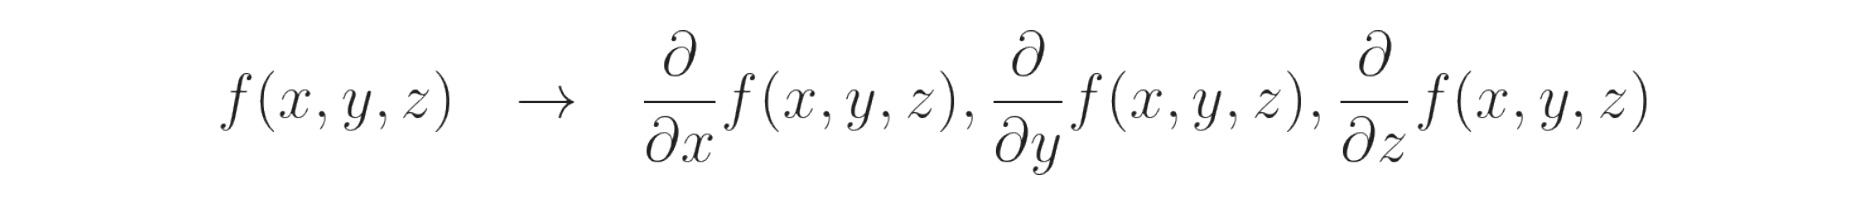

Derivatives are not limited to addition/multiplication. We need to derive them for other functions used in forward pass, like `max()`

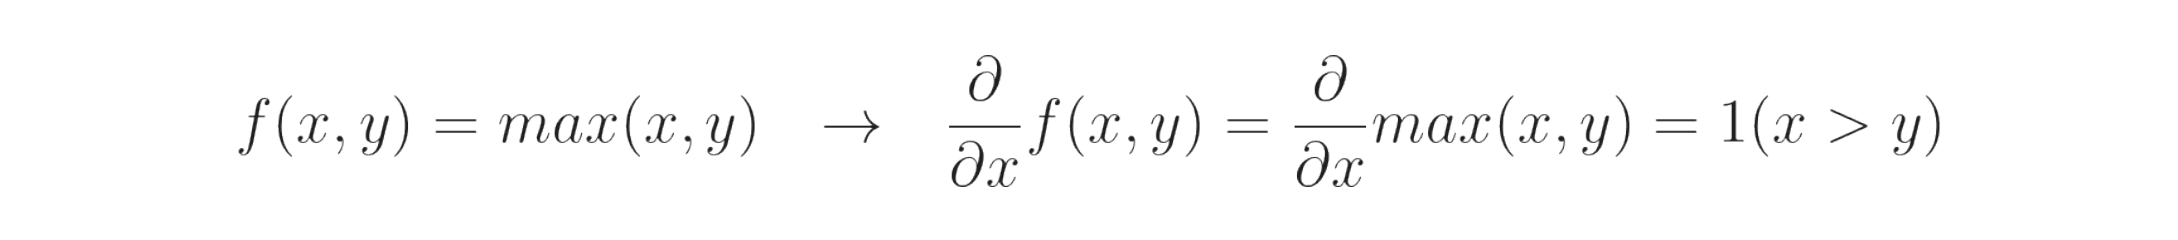

The **partial derivative** measures how much impact a single input has on a function's output.

When you combine the partial derivative of all the parameters, the resulting set of equations are called the <font color='#e59454'>**gradient**</font>.

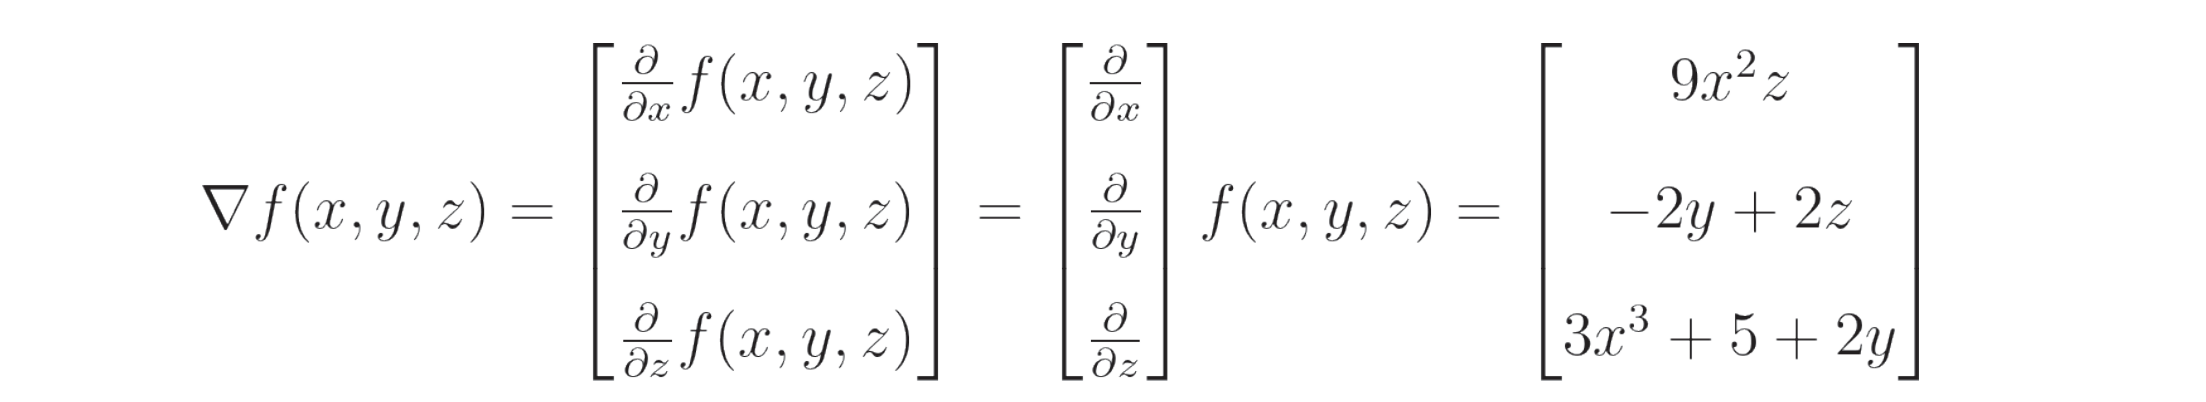

Similar to the image below, the forward pass is a chain of functions. We pass input data to the first layer where we have the layer's weights and biases and the resultant flows through the ReLU activation function. We repeat this calculation in another layer, all the way to the output layer and softmax activation

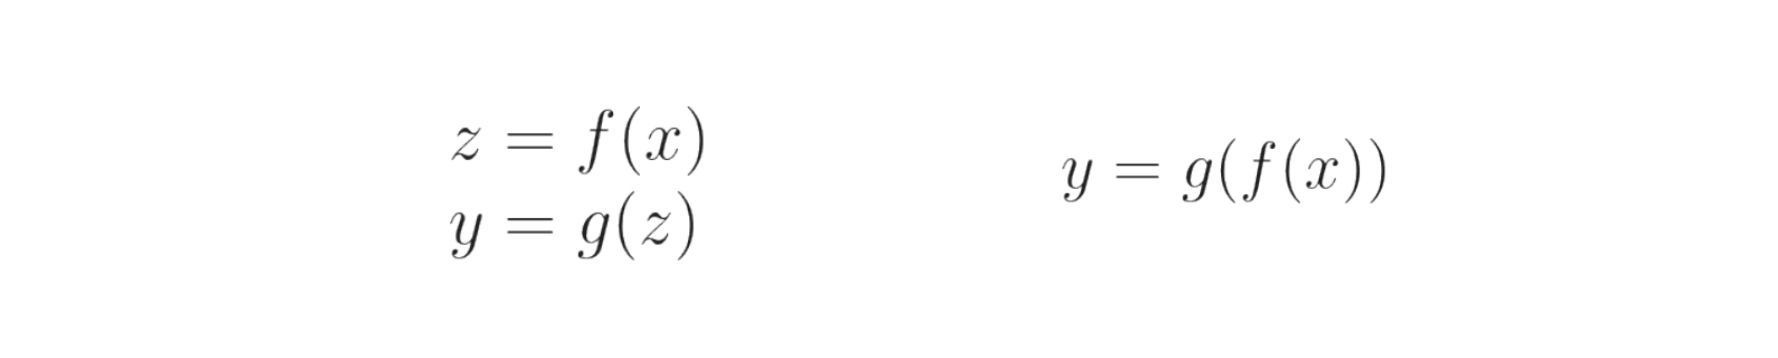

We need to learn how each weight and bias impacts loss to improve loss. To do this for a chain of functions, use the *chain rule*, which says that the derivative of a function chain is a product of derivatives of all the functions in this chain.

To calculate how a parameter (like a weight) affects the loss, we:

1. Start by finding the derivative of the outermost function with respect to the next function.
2. Multiply this by the derivative of the next function with respect to the one before it.
3. Continue multiplying the derivatives of each function in the chain until you reach the parameter (weight or bias).

The chain rule is essential for figuring out how a single input impacts the final output, which in this case is the loss.

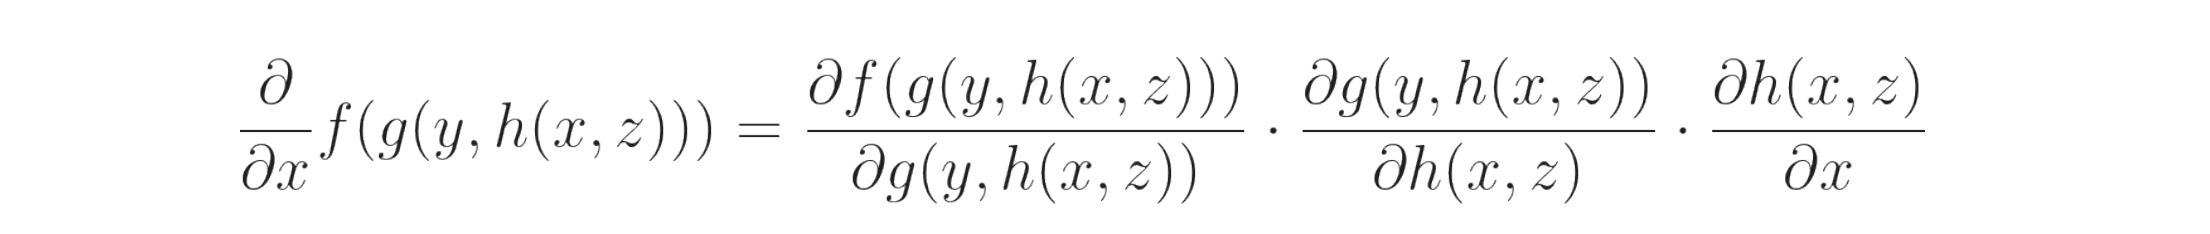

Let's backpropogate the ReLU function for a single neuron and act as if we intend to minimise the output for this single neuron. We will leverage the chain rule with derivatives and partial derivatives to calculate the impact of each variable on the ReLU activated output.

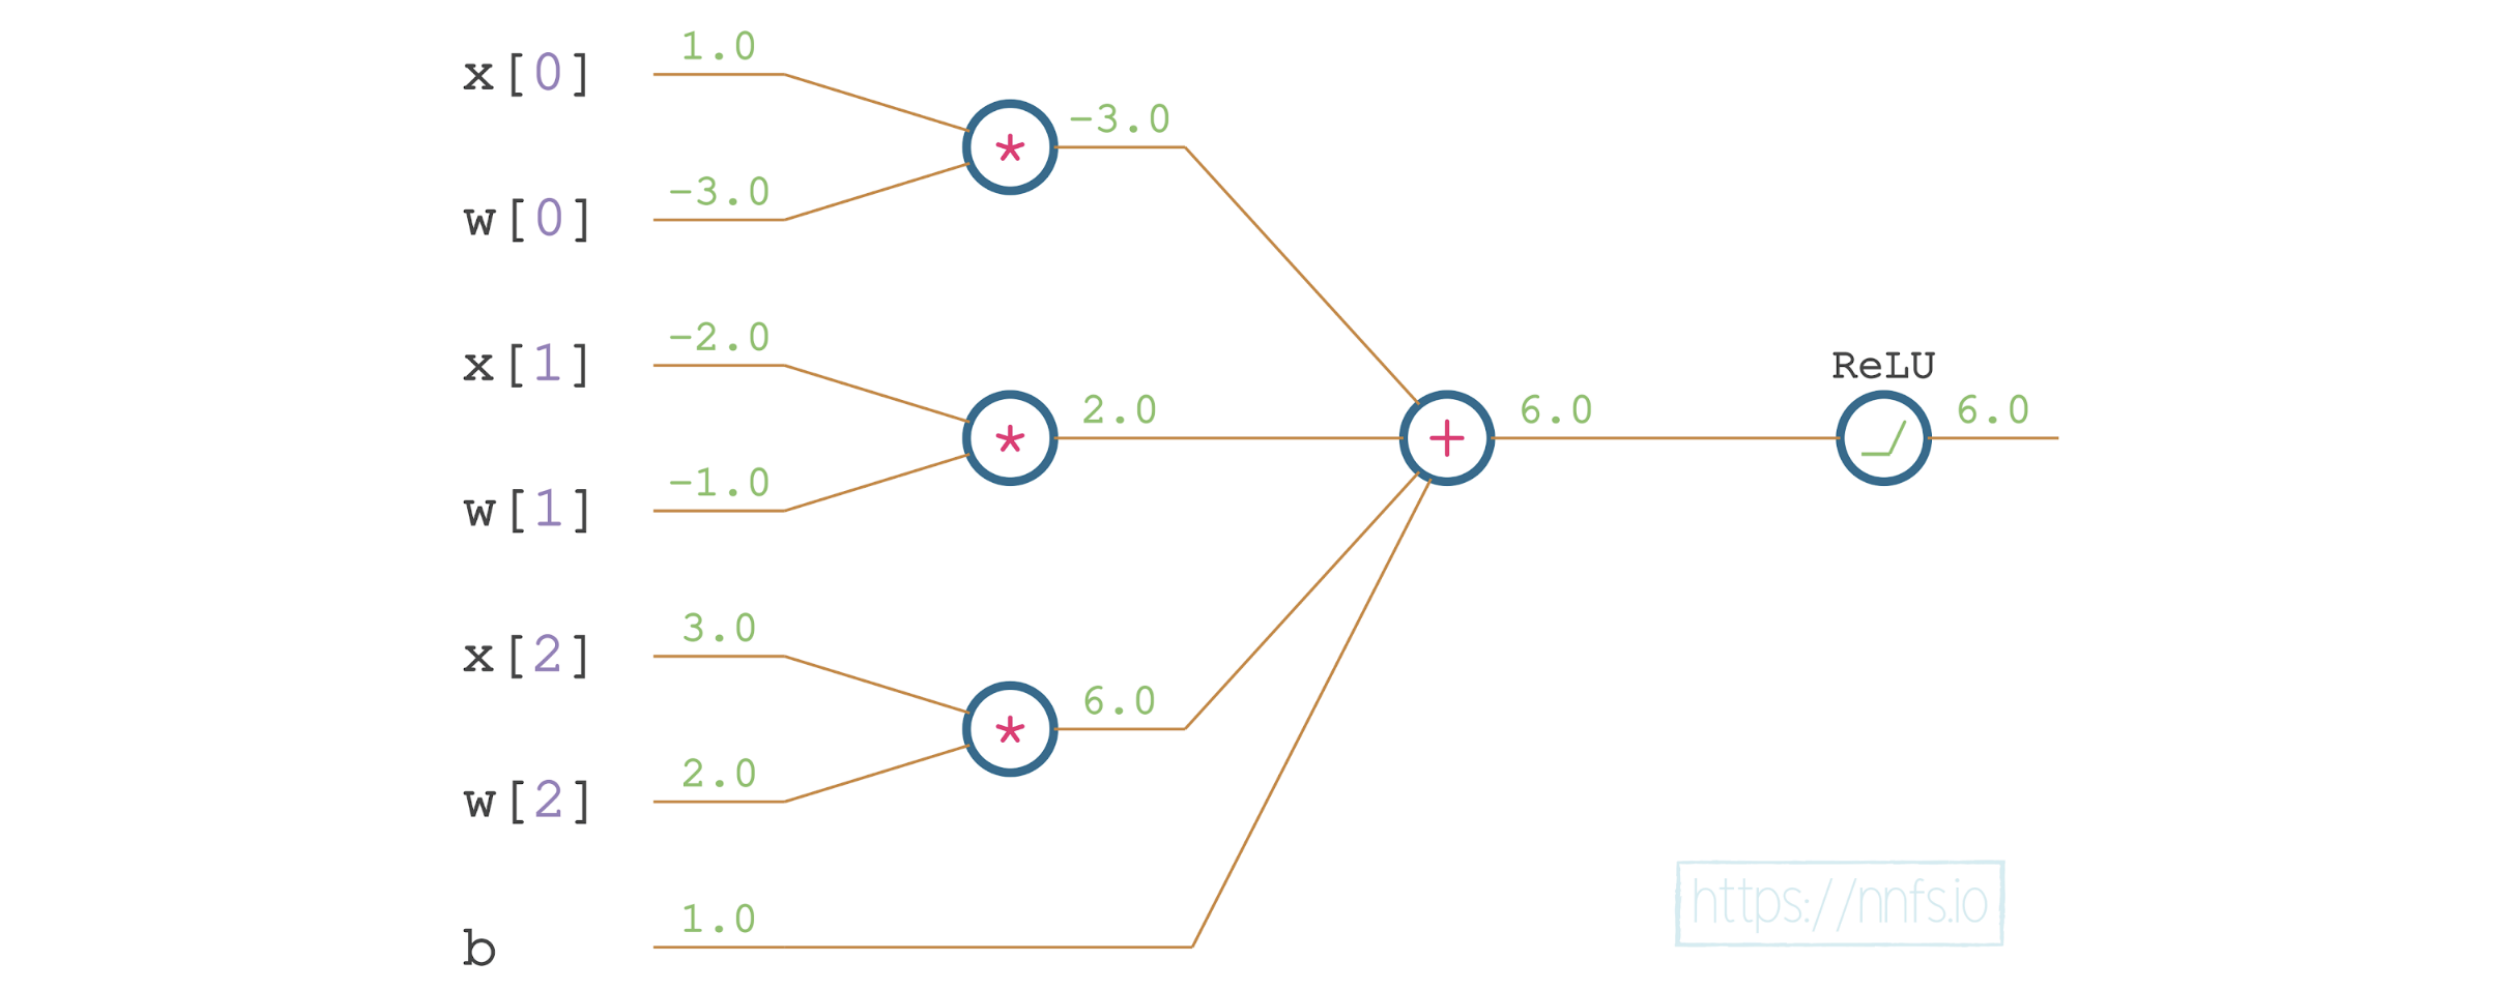

In [ ]:
# neuron with 3 inputs
x = np.array([1.0, -2.0, 3.0]) # inputs
w = np.array([-3.0, -1.0, 2.0]) # weights
b = 1.0 # bias

## forward pass
# input*weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# add bias
z = xw0 + xw1 + xw2 + b

# ReLU activation function
y = max(z, 0)
print(y)

6.0


First step is to backpropogate our gradients by calculating derivatives and partial derivatives wrt each of our parameters and inputs using the chain rule. The nested function we are faced with can be written as below.

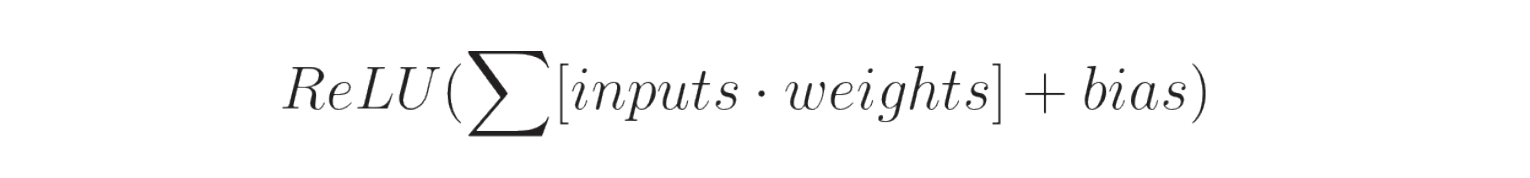

The derivatives wrt the weights and a bias will inform us about their impact and will be used to update their weights and bias. The derivative wrt the inputs are used to chain more layers by passing them to the previous function in the chain.

We will have to calculate the derivative of the loss function and apply the chain rule with the derivatives of all activation functions and neurons in all of the consecutive layers. The derivative wrt weights and biases is used to update any parameters. The derivative wrt layer's inputs is used to chain to another layer (which is why we backpropogate to the previous layer in the chain)

**Backward pass**

Derivative from next layer:

$\frac{d y}{d y} = 1.0$

Derivative of ReLU and chain rule:

$(1.0) * \frac{d}{d z}ReLU(z) = 1(z>0)=1(6>0)= 1.0 * 1.0 = 1.0$

Partial derivatives of summation and chain rule:

$1.0 * \frac{\delta}{\delta (x_0 w_0)} (x_0w_0 + x_1w_1 + x_2w_2 + b) = (1.0) * (1.0) = 1.0$

$1.0 * \frac{\delta}{\delta (x_1 w_1)} (x_0w_0 + x_1w_1 + x_2w_2 + b) = (1.0) * (1.0) = 1.0$

$1.0 * \frac{\delta}{\delta (x_2 w_2)} (x_0w_0 + x_1w_1 + x_2w_2 + b) = (1.0) * (1.0) = 1.0$

$1.0 * \frac{\delta}{\delta b} (x_0w_0 + x_1w_1 + x_2w_2 + b) = (1.0) * (1.0) = 1.0$

Partial derivatives of multiplication and chain rule:

$(1.0) * \frac{\delta}{\delta x_0}(x_0w_0) = (1.0) * w_0 = -3.0$

$(1.0) * \frac{\delta}{\delta w_0}(x_0w_0) = (1.0) * x_0 = 1.0$

$(1.0) * \frac{\delta}{\delta x_1}(x_0w_0) = (1.0) * w_1 = -1.0$

$(1.0) * \frac{\delta}{\delta w_1}(x_0w_0) = (1.0) * x_1 = -2.0$

$(1.0) * \frac{\delta}{\delta x_2}(x_0w_0) = (1.0) * w_2 = 2.0$

$(1.0) * \frac{\delta}{\delta w_2}(x_0w_0) = (1.0) * x_2 = 3.0$

In [ ]:
## backward pass
# derivative from the next layer
dvalue = 1.0 # ∂y / ∂y = 1
print(dvalue)

# derivative of ReLU and chain rule
# (∂y / ∂y) * (∂ ReLU(z) / ∂
drelu_dz = dvalue * (1.0 if z > 0 else 0.)
print(drelu_dz)

# partial derivatives of summation, the chain rule
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_db = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db
print(drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db)

# Partial derivatives of the multiplication and chain rule
dmul_dx0 = w[0]
dmul_dx1 = w[1]
dmul_dx2 = w[2]
dmul_dw0 = x[0]
dmul_dw1 = x[1]
dmul_dw2 = x[2]
drelu_dx0 = drelu_dxw0 * dmul_dx0
drelu_dw0 = drelu_dxw0 * dmul_dw0
drelu_dx1 = drelu_dxw1 * dmul_dx1
drelu_dw1 = drelu_dxw1 * dmul_dw1
drelu_dx2 = drelu_dxw2 * dmul_dx2
drelu_dw2 = drelu_dxw2 * dmul_dw2
print(drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2)

1.0
1.0
1.0 1.0 1.0 1.0
-3.0 1.0 -1.0 -2.0 2.0 3.0


Working backward by taking the ReLU() derivative, taking the summing operation's derivative, multiplying both, so on...  is backpropogating using the chain rule. The resulting output function's gradients are passed back through NN, using multiplication of the gradient of subsequent functions from later layers with the current one.

This is the complete set of the activated neuron's partial derivatives wrt the inputs, weights, and a bias. If you'd like to see a visualization of this backpropogation process, check out [this video](https://www.youtube.com/watch?v=_9qHQA30hys&t=2s)

# <b> <font color='#569098'> Section 7: Optimizers

We want to use the calculated gradient to adjust weights and biases, to ultimately decrease the measure of loss. We can successfully decrease a neuron's activation function's (ReLU) output in this manner. In our previous approach, we subtracted a fraction of the gradient from each weight and bias to achieve this adjustment. When we have millions, billions, or even more dimensions, <font color='#e59454'>**stochastic gradient descent (SGD)**</font> is the best known way to search for global minimum.

# <b> <font color='#569098'> Section 8: Learning rate and momentum

Even though we want our model to be as accurate as possible, the optimizer's goal is to minimize loss, not directly improve accuracy. Loss is the average of individual sample losses, so while some losses may decrease significantly, others might only increase slightly, which can lead to incorrect predictions. This can lower the overall loss but but increase the number of incorrectly predicted samples, thus lowering the accuracy.

Early in training, larger updates help explore different areas of the solution space, but as training progresses, we want smaller, more refined updates. To achieve this we implement a **<font color='#e59454'>learning rate decay</font>**. By dividing the initial learning rate by the step count, we ensure the learning rate drops quickly at first and slows down later. This allows the model to make fine adjustments as it nears the optimal solution.

In the last section we introduced **<font color='#e59454'>SGD</font>** as a way to optimize the model. While it can be effective, it’s a basic method that follows the gradient without additional logic that could potentially help the model find the global minimum to the loss function.  

**<font color='#e59454'>Momentum</font>** addresses this by creating a rolling average of gradients over several updates, combining this average with the current gradient. This helps the model move past local minima and further reduce loss.


# <b> <font color='#569098'> Section 9: Complete Neural Network from scratch </b>

Let's implement the concepts we learnt into a simple neural network. The intention of this workshop was to introduce some of the key concepts behind neural networks - not cover *every* aspect of machine learning (a strong grasp will require multiple workshops and experience playing with several architectures and datasets). Athough a first pass might be intimidating, please run each of the cells below to observe instantiating and training our model. After doing so, feel free to take a second pass through the code.

## <b><font color='#569098'>Defining the model</b>

Below is a slew of classes we will be using to create our model. You are not expected to to understand every class, but skim through the comments to see the general purpose of each.

In [ ]:
# Dense layer
class Layer_Dense:
  """
  Dense layer of a neural network
  Facilitates:
  - Forward propogation of data throught layer
  - Backward propogation of gradients during training
  """

  # Layer initialization
  def __init__(self, n_inputs, n_neurons):
    # Initialize weights and biases
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  # Forward pass
  def forward(self, inputs):
    # Remember input values
    self.inputs = inputs
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases

  # Backward pass
  def backward(self, dvalues):
    # Gradients on parameters
    self.dweights = np.dot(self.inputs.T, dvalues)
    self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
    # Gradient on values
    self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:
  """
  Rectified linear unit activation function
  Applied to input of neural network layer
  Introduces non-linearity into the network
  """
  # Forward pass
  def forward(self, inputs):
    # Remember input values
    self.inputs = inputs
    # Calculate output values from inputs
    self.output = np.maximum(0, inputs)

  # Backward pass
  def backward(self, dvalues):
    # Since we need to modify original variable,
    # let’s make a copy of values first
    self.dinputs = dvalues.copy()
    # Zero gradient where input values were negative
    self.dinputs[self.inputs <= 0] = 0


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():
  """
  Combination of softmax activation function and categorical cross entropy loss function
  Commonly used in classification tasks
  We minimize loss by adjustng model parameters to improve performance
  """

  # create activation and loss function objectives
  def __init__(self):
    self.activation = Activation_Softmax()
    self.loss = Loss_CategoricalCrossentropy()

  # forward pass
  def forward(self, inputs, y_true):
    # output layer's activation function
    self.activation.forward(inputs)
    # set the output
    self.output = self.activation.output
    # calculate and return loss value
    return self.loss.calculate(self.output, y_true)

  # backward pass
  def backward(self, dvalues, y_true):

    # number of samples
    samples = len(dvalues)

    # if labels one-hot encoded, turn into discrete values
    if len(y_true.shape) == 2:
      y_true = np.argmax(y_true, axis=1)

    # copy so we can safely modify
    self.dinputs = dvalues.copy()
    # Calculate gradient
    self.dinputs[range(samples), y_true] -= 1
    # Normalize gradient
    self.dinputs = self.dinputs / samples


# Adam optimizer
class Optimizer_Adam:

  """
  Adam optimization algorithm to optimize parameters of neural network
  Initalize with learning rate, decay, epsilon, momentum
  Pre-update params: Adjust learning rate based on decay
  Update params: Update params using momentum and cache corrections
  Post-update params: Track number of optimization steps performed
  """

  # Initialize optimizer - set settings
  def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
    self.learning_rate = learning_rate
    self.current_learning_rate = learning_rate
    self.decay = decay
    self.iterations = 0
    self.epsilon = epsilon
    self.beta_1 = beta_1
    self.beta_2 = beta_2

  # Call once before any parameter updates
  def pre_update_params(self):
    if self.decay:
      self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

  # Update parameters
  def update_params(self, layer):

    # If layer does not contain cache arrays, create them filled with zeros
    if not hasattr(layer, 'weight_cache'):
      layer.weight_momentums = np.zeros_like(layer.weights)
      layer.weight_cache = np.zeros_like(layer.weights)
      layer.bias_momentums = np.zeros_like(layer.biases)
      layer.bias_cache = np.zeros_like(layer.biases)

    # Update momentum with current gradients
    layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
    layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

    # Get corrected momentum
    # self.iteration is 0 at first pass
    # and we need to start with 1 here
    weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
    bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

    # update cache with squared current gradients
    layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
    layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2

    # get corrected cache
    weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
    bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

    # Vanilla SGD parameter update + normalization with square root cache
    layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
    layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

  # call once after any parameter updates
  def post_update_params(self):
    self.iterations += 1


# Softmax activation
class Activation_Softmax:

  """
  Softmax activation function for multi-class classification
  Compute probabilities for each class
  """

  # Forward pass
  def forward(self, inputs):
    # Remember input values
    self.inputs = inputs
    # Get unnormalized probabilities
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

    # Normalize them for each sample
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    self.output = probabilities

  # Backward pass
  def backward(self, dvalues):
    # Create uninitialized array
    self.dinputs = np.empty_like(dvalues)

    # Enumerate outputs and gradients
    for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
      # Flatten output array
      single_output = single_output.reshape(-1, 1)

      # Calculate Jacobian matrix of the output
      jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)

      # Calculate sample-wise gradient and add it to the array of sample gradients
      self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)


# Common loss class
class Loss:

  # calculates data and regularization losses, given model output and ground truth values
  def calculate(self, output, y):

    # calculate sample losses
    sample_losses = self.forward(output, y)

    # calculate mean losses
    data_loss = np.mean(sample_losses)

    # return loss
    return data_loss


# cross entropy loss
class Loss_CategoricalCrossentropy(Loss):
  """
  Computes categorical cross entropy
  Quantifies discrepency between predicted and true class probabilities
  """

  # forward pass
  def forward(self, y_pred, y_true):

    # number samples in batch
    samples = len(y_pred)

    # clip data to prevent division by 0
    # clip both sides to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

    # probabilities for target values (only if categorical labels)
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[ range(samples), y_true ]

    # mask values (only for one-hot encoded labels)
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum( y_pred_clipped * y_true, axis=1 )

    # losses
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

  # backward pass
  def backward(self, dvalues, y_true):

    # number of samples
    samples = len(dvalues)
    # Number of labels in every sample
    # We’ll use the first sample to count them
    labels = len(dvalues[0])

    if len(y_true.shape) == 1:
      y_true = np.eye(labels)[y_true]

    # calculate gradient
    self.dinputs = -y_true / dvalues
    # Normalize gradient
    self.dinputs = self.dinputs / samples

## <b><font color='#569098'>Creating dataset</b>

We will be training a neural network to predict the color of a point (y $ϵ$ $\{$green, red, or blue $\}$ ) given an input $X$ of two descripitive features (the x and y coordinates)

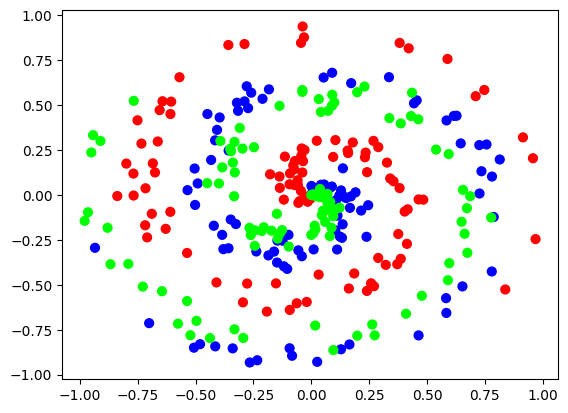

In [ ]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')

In [ ]:
# an example feature set (x,y) and it's label (color)
X[5], y[5]

## <b><font color='#569098'>Instantiating model</b>

We will be using a feedforward neural network consisting of two dense (fully connected) layers with ReLU activation, where the first layer takes 2 input features and outputs 64 neurons, and the second layer takes 64 neurons and outputs 3 neurons.

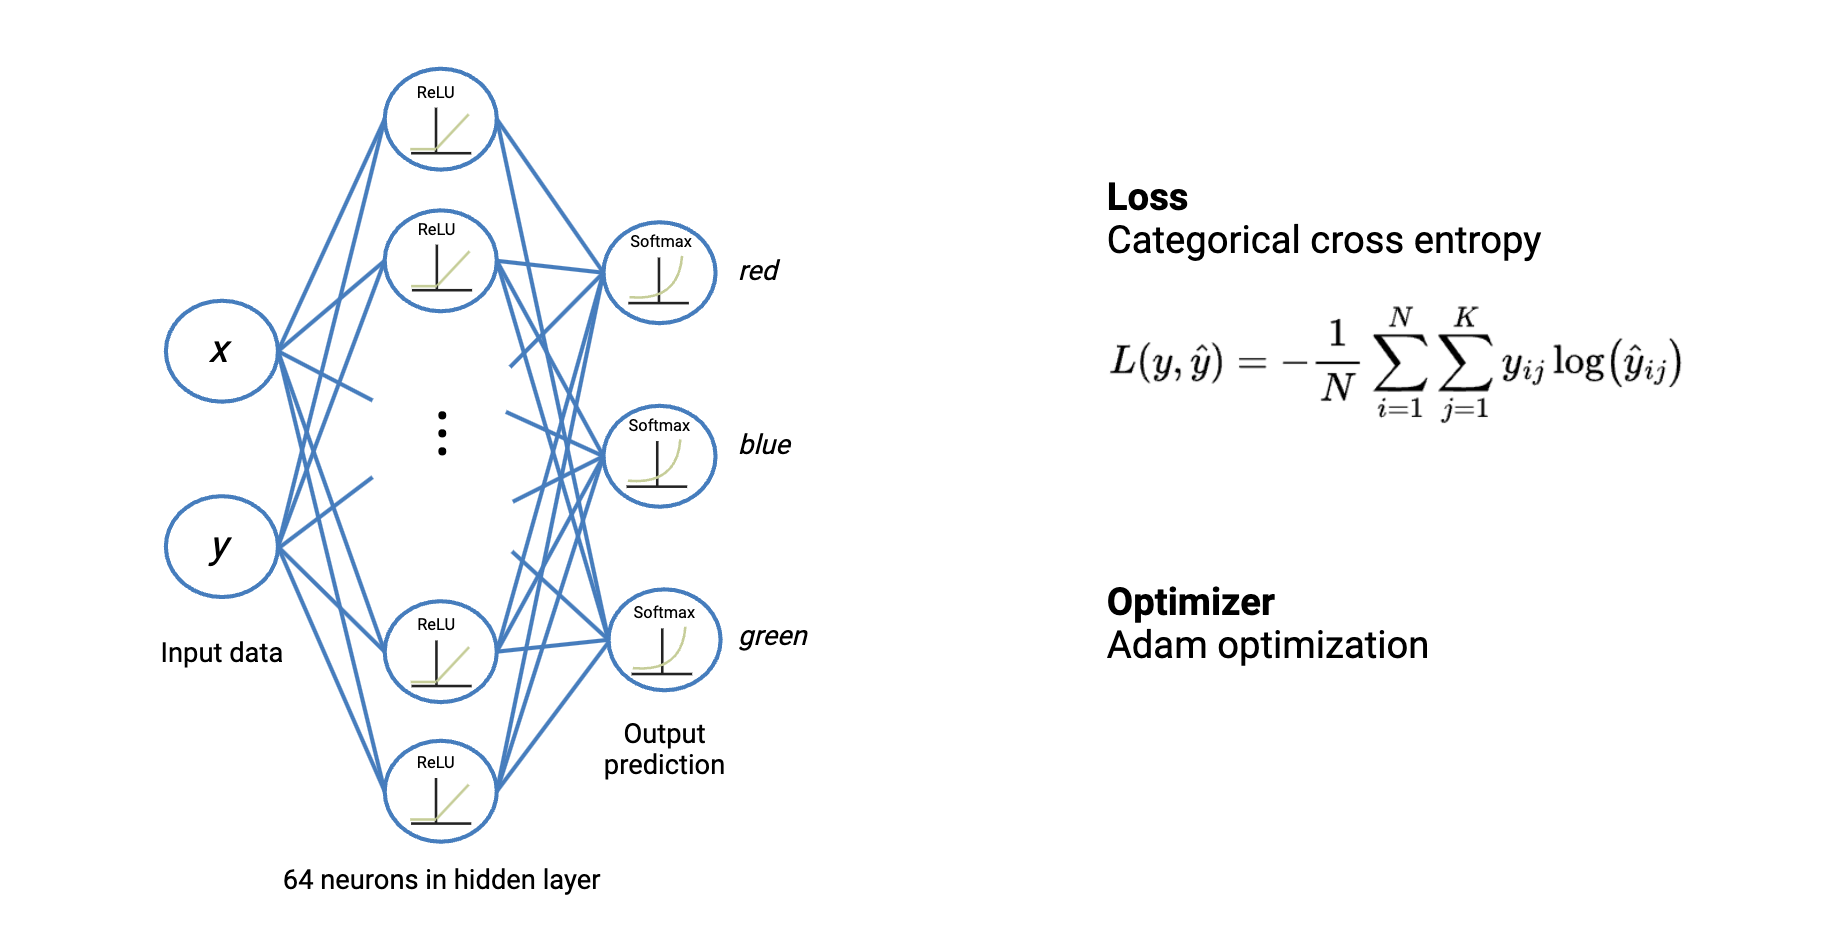

In [ ]:
# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier’s combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_Adam(learning_rate=0.05, decay=5e-7)

## <b><font color='#569098'>Training</b>

In [ ]:
# Train in loop
for epoch in range(10001):
  # Perform a forward pass of our training data through this layer
  dense1.forward(X)

  # Perform a forward pass through activation function
  # takes the output of first dense layer here
  activation1.forward(dense1.output)

  # Perform a forward pass through second Dense layer
  # takes outputs of activation function of first layer as inputs
  dense2.forward(activation1.output)

  # Perform a forward pass through the activation/loss function
  # takes the output of second dense layer here and returns loss
  loss = loss_activation.forward(dense2.output, y)

  # Calculate accuracy from output of activation2 and targets
  # calculate values along first axis
  predictions = np.argmax(loss_activation.output, axis=1)

  if len(y.shape) == 2:
    y = np.argmax(y, axis=1)

  accuracy = np.mean(predictions==y)

  if not epoch % 100:
    print(f'epoch: {epoch}, ' + f'acc: {accuracy:.3f}, ' + f'loss: {loss:.3f}, ' + f'lr: {optimizer.current_learning_rate}')

  # backward pass
  loss_activation.backward(loss_activation.output, y)
  dense2.backward(loss_activation.dinputs)
  activation1.backward(dense2.dinputs)
  dense1.backward(activation1.dinputs)

  # update weights and biases
  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()



epoch: 0, acc: 0.360, loss: 1.099, lr: 0.05
epoch: 100, acc: 0.670, loss: 0.705, lr: 0.04999752512250644
epoch: 200, acc: 0.797, loss: 0.522, lr: 0.04999502549496326
epoch: 300, acc: 0.847, loss: 0.430, lr: 0.049992526117345455
epoch: 400, acc: 0.887, loss: 0.344, lr: 0.04999002698961558
epoch: 500, acc: 0.910, loss: 0.303, lr: 0.049987528111736124
epoch: 600, acc: 0.907, loss: 0.276, lr: 0.049985029483669646
epoch: 700, acc: 0.917, loss: 0.252, lr: 0.049982531105378675
epoch: 800, acc: 0.920, loss: 0.245, lr: 0.04998003297682575
epoch: 900, acc: 0.930, loss: 0.228, lr: 0.049977535097973466
epoch: 1000, acc: 0.940, loss: 0.217, lr: 0.049975037468784345
epoch: 1100, acc: 0.937, loss: 0.205, lr: 0.049972540089220974
epoch: 1200, acc: 0.947, loss: 0.192, lr: 0.04997004295924593
epoch: 1300, acc: 0.947, loss: 0.184, lr: 0.04996754607882181
epoch: 1400, acc: 0.943, loss: 0.183, lr: 0.049965049447911185
epoch: 1500, acc: 0.943, loss: 0.189, lr: 0.04996255306647668
epoch: 1600, acc: 0.943, lo

## <b><font color='#569098'>Visualizing predictions

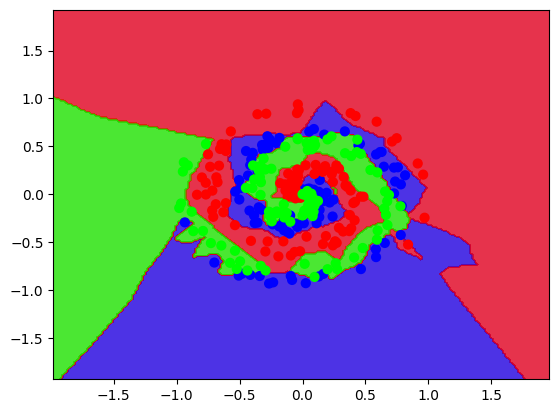

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have access to the weights and biases of your trained model
# For the weights and biases of dense1 and dense2 layers
W1, b1 = dense1.weights, dense1.biases
W2, b2 = dense2.weights, dense2.biases

# Create a meshgrid of points covering the feature space
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Flatten the meshgrid points and apply the first dense layer and ReLU activation
points = np.c_[xx.ravel(), yy.ravel()]
z1 = np.dot(points, W1) + b1
a1 = np.maximum(0, z1)

# Apply the second dense layer
z2 = np.dot(a1, W2) + b2

# Apply softmax activation to get probabilities
exp_scores = np.exp(z2 - np.max(z2, axis=1, keepdims=True))
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# Predictions
predictions = np.argmax(probs, axis=1)
Z = predictions.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap='brg', alpha=0.8)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

That was training a full neural network from scratch in Numpy (phew!). Although this was meticulous, it should give you an appreciation of the amount of work done under the hood in deep learning packages like PyTorch. And although this was not an extensive overview of all aspects of the anatomy of a neural network architecture and training, you (hopefully) have a slightly better understanding of some of the key introductory concepts. When ready, also make sure to check out a reimplementation of the same architecture in PyTorch in `WS4_IntroToNNs_PyTorch.ipynb`.